In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime
from dateutil import parser

import warnings

warnings.filterwarnings('ignore')


Read data from file - and factorize() the city - which means turn all of the values into integer representation and class types (create key). 

create a dictionary called city data - and pull all data of each city

In [3]:
rawdata = pd.read_csv("COVID-data_consolidated - County_City Race 1.csv", dtype=object)

c, v = rawdata['city'].factorize()
c, v

citydata = {}
print(v)
# v[1]
# rawdata[rawdata['city'] == v[1]]
for city in v: 
    citydata[city] = rawdata[rawdata['city'] == city]


Index(['Chelsea', 'Newton', 'Revere', 'Wellesley', 'Springfield', 'Everett'], dtype='object')


Create racial dataframes and copy over racial data to those dataframes. Add a column with a datetime object of the date for later plotting.

In [4]:

hispanicdata = pd.DataFrame()
blackdata = pd.DataFrame()
caucasiandata = pd.DataFrame()
asiandata = pd.DataFrame()

for c, df in citydata.items():
    # df.head()
    df['datetime'] = df['date'].apply(lambda x: parser.parse(x))
    hispanicdata = pd.concat([hispanicdata, df[df['race'] == 'Hispanic']])
    blackdata = pd.concat([blackdata, df[df['race'] == 'Black']])
    caucasiandata = pd.concat([caucasiandata, df[df['race'] == 'White']])
    asiandata = pd.concat([asiandata, df[df['race'] == 'Asian']])
# hispanicdata.head()

Create features - demographic vaccinated, rate of vaccination (at least one dose), demographic vaccinated percentage and rate of vaccination (fully vaccinated).

In [5]:

racialdata = [hispanicdata.reset_index(), blackdata.reset_index(), caucasiandata.reset_index(), asiandata.reset_index()]
# hispanicdata.columns
for set in racialdata:
    set['percentage (at least one dose)'] = set['atleast_onedose'].astype(float)/set['population'].astype(float)
    set['d(% at least one dose)'] = set['percentage (at least one dose)'].diff()
    set['d(% at least one dose)'][0] = 0
    set['percentage (fully vaccinated)'] = set['fully_vaccinated'].astype(float)/set['population'].astype(float)
    set['d(% fully vaccinated)'] = set['percentage (fully vaccinated)'].diff()
    set['d(% fully vaccinated)'][0] = 0


# racialdata[1].head()

Plotting all data - percentage fully vaccinated against entire timeline

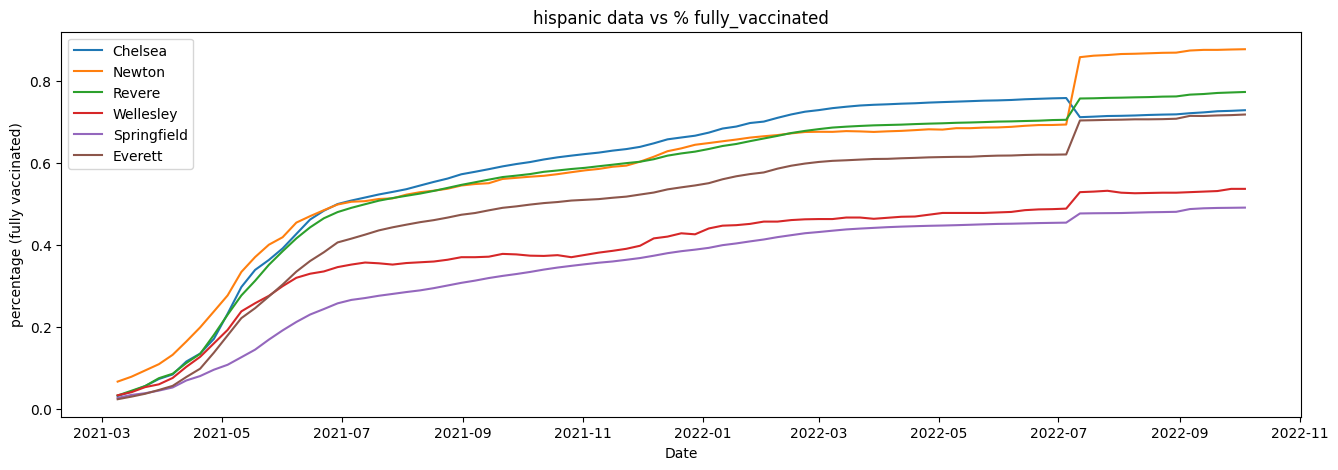

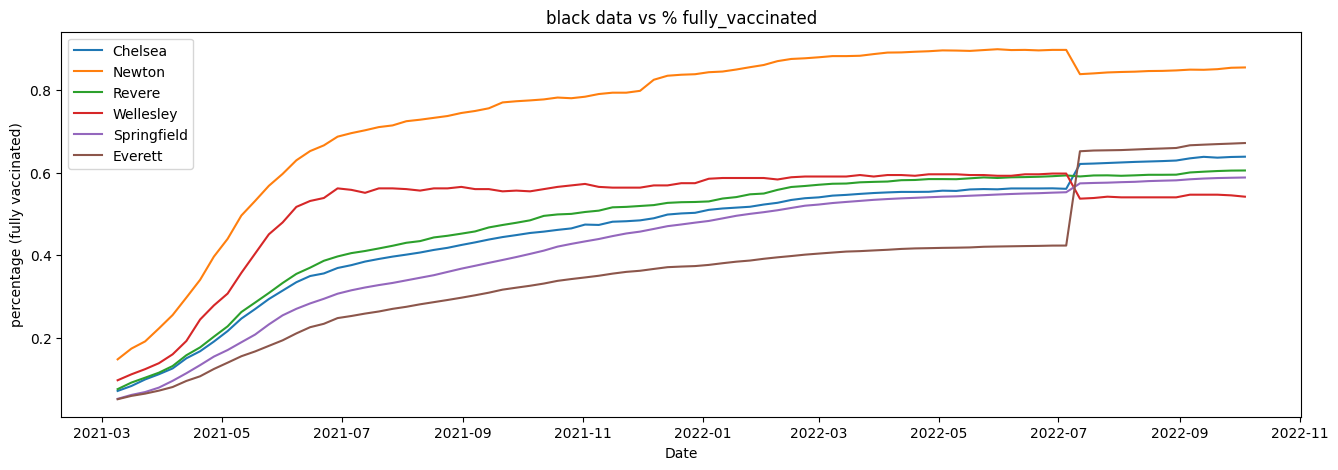

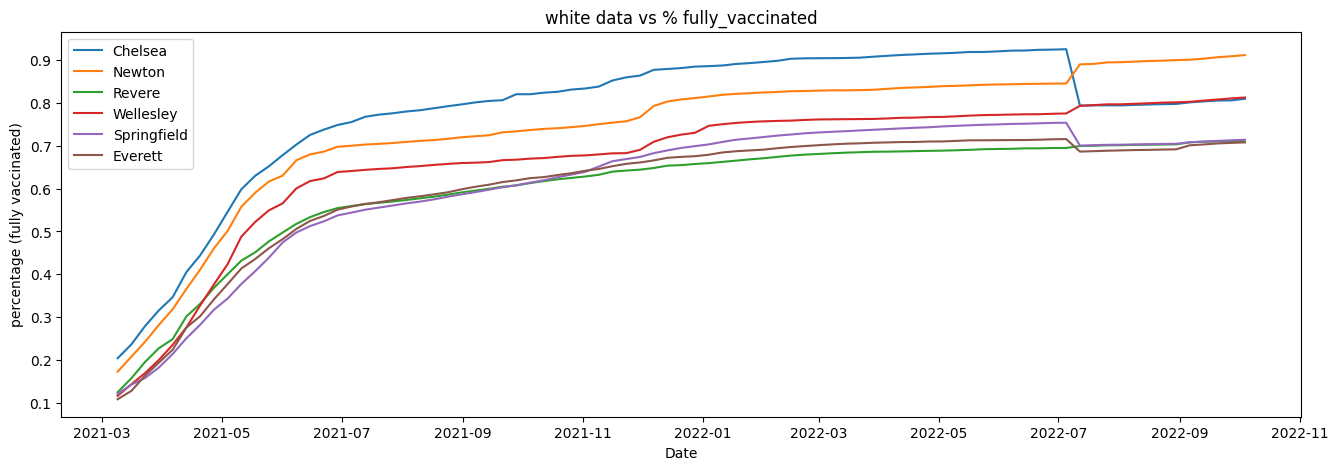

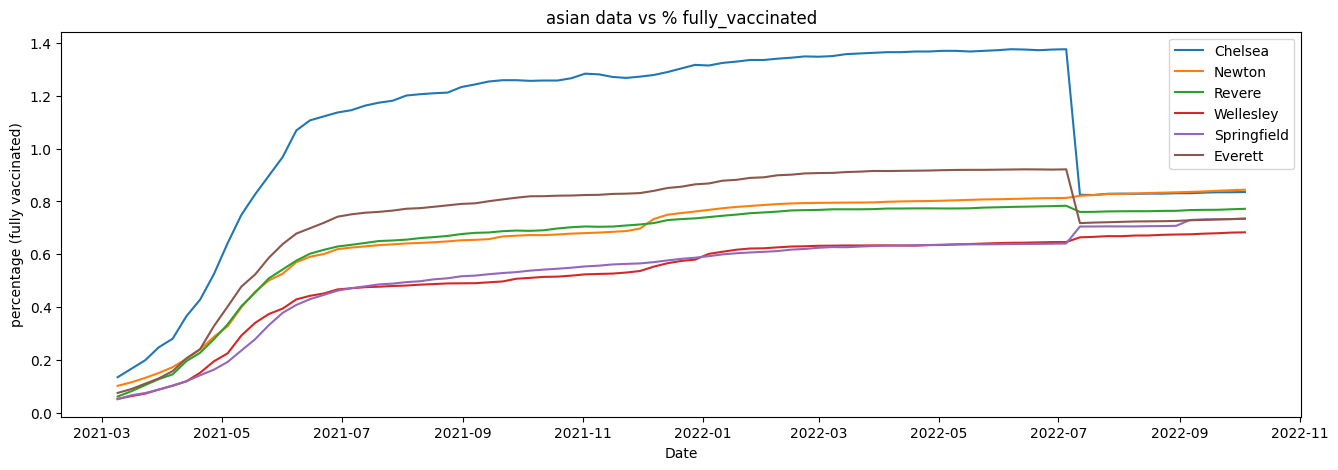

In [6]:


def plot_df(df, ylabel, title="", xlabel='Date', dpi=100, beginning = "03/09/2021", end = "10/4/2022"):

    beginning = parser.parse(beginning)
    end = parser.parse(end)

    v, cities = df['city'].factorize()
    plt.figure(figsize=(16,5), dpi=dpi)
    for city in cities:
        subdf = df[df['city']==city]
        subdf = subdf[subdf['datetime'] <= end]
        subdf = subdf[subdf['datetime'] >= beginning]
        # print(subdf.shape)
        plt.plot(subdf['datetime'], subdf[ylabel], label = city)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

# for set in racialdata:
plot_df(racialdata[0], 'percentage (fully vaccinated)', title = 'hispanic data vs % fully_vaccinated',)
plot_df(racialdata[1], 'percentage (fully vaccinated)', title = 'black data vs % fully_vaccinated',)
plot_df(racialdata[2], 'percentage (fully vaccinated)', title = 'white data vs % fully_vaccinated',)
plot_df(racialdata[3], 'percentage (fully vaccinated)', title = 'asian data vs % fully_vaccinated',)




Breaking down timeline into 5 sections - early, mid, late, booster1, booster2 vaccine rollouts. Plotting percentage (fully vaccinated) against each of these time series sections.

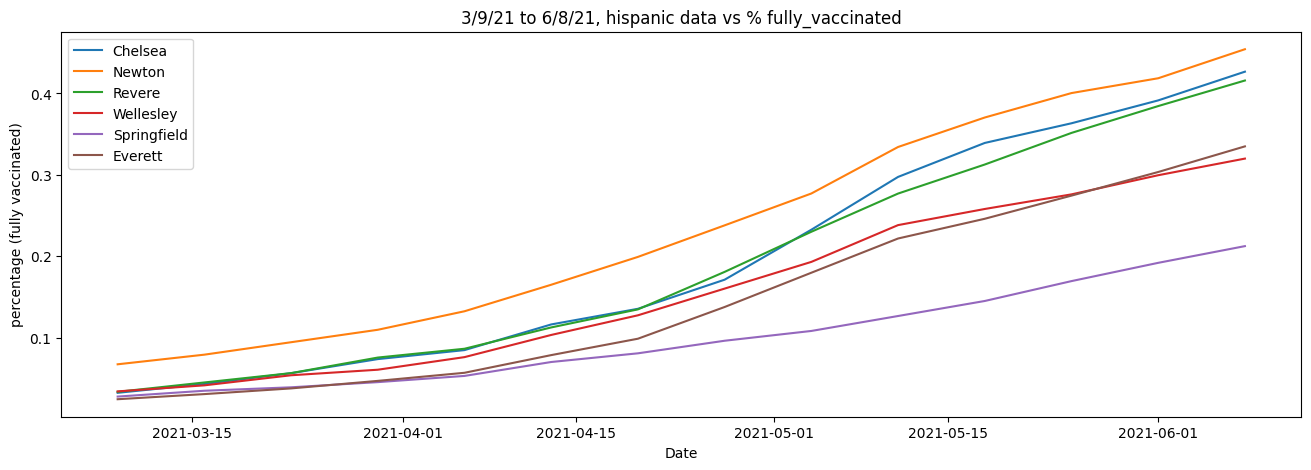

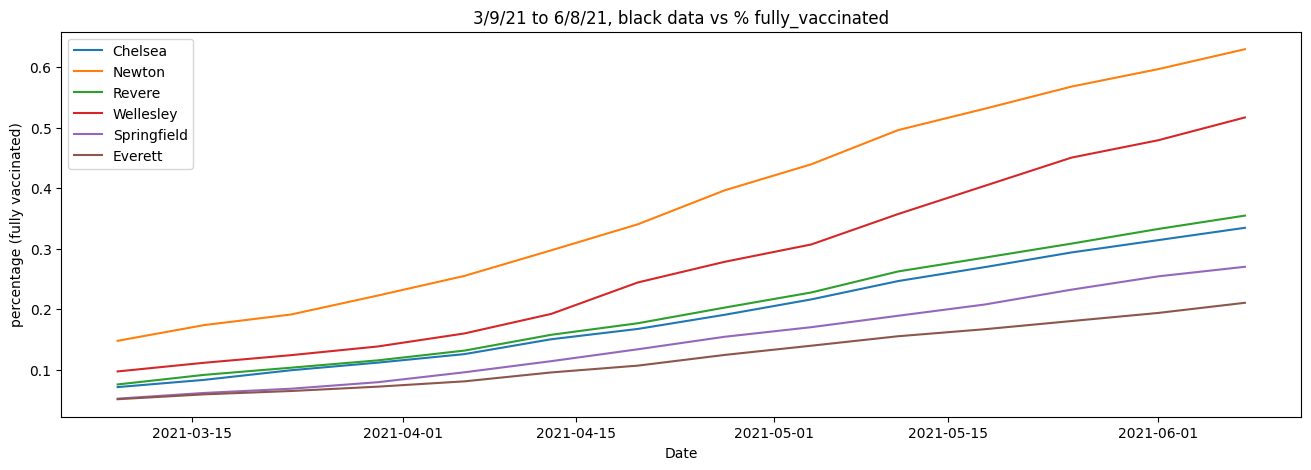

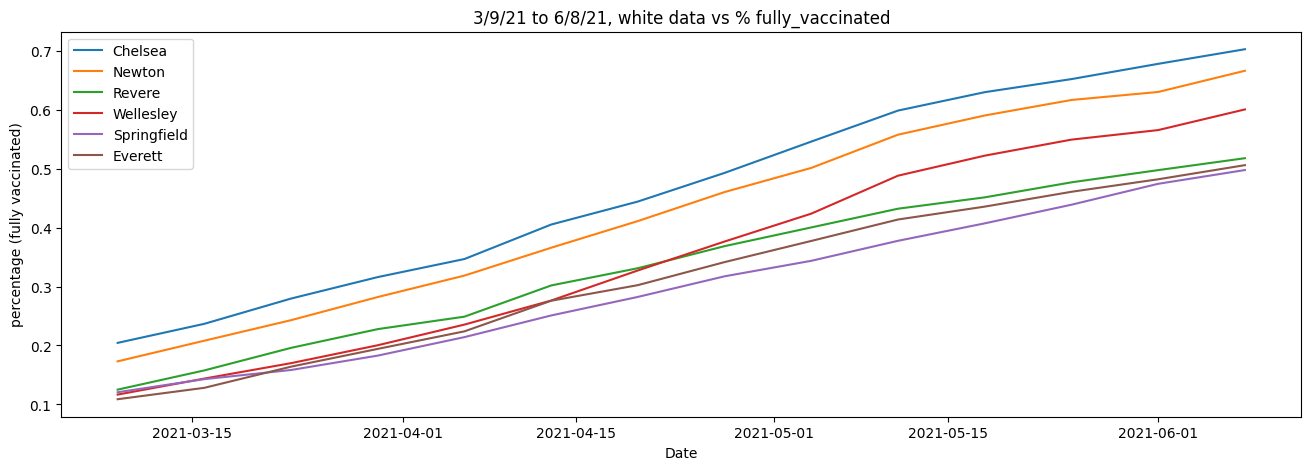

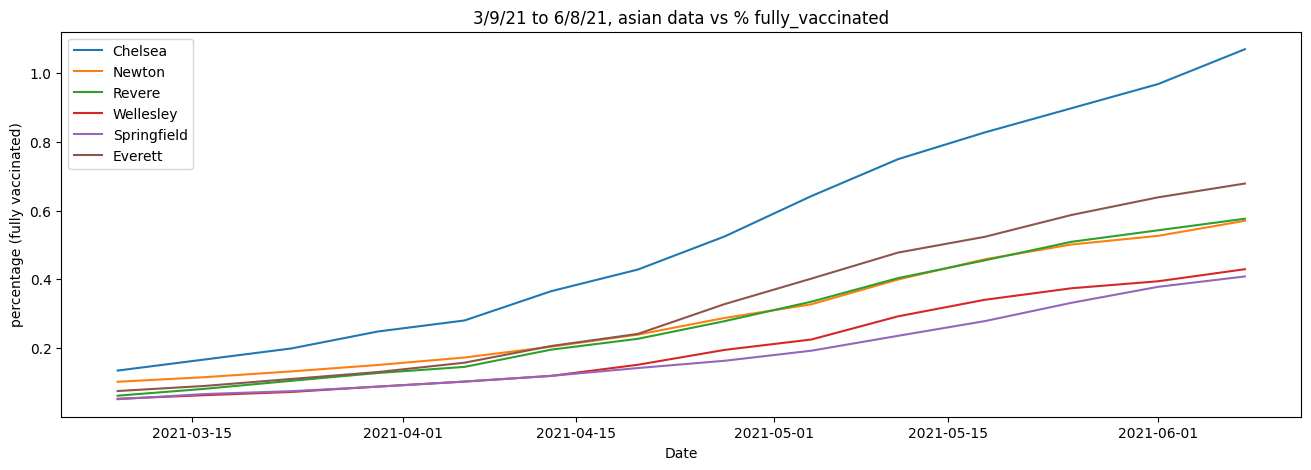

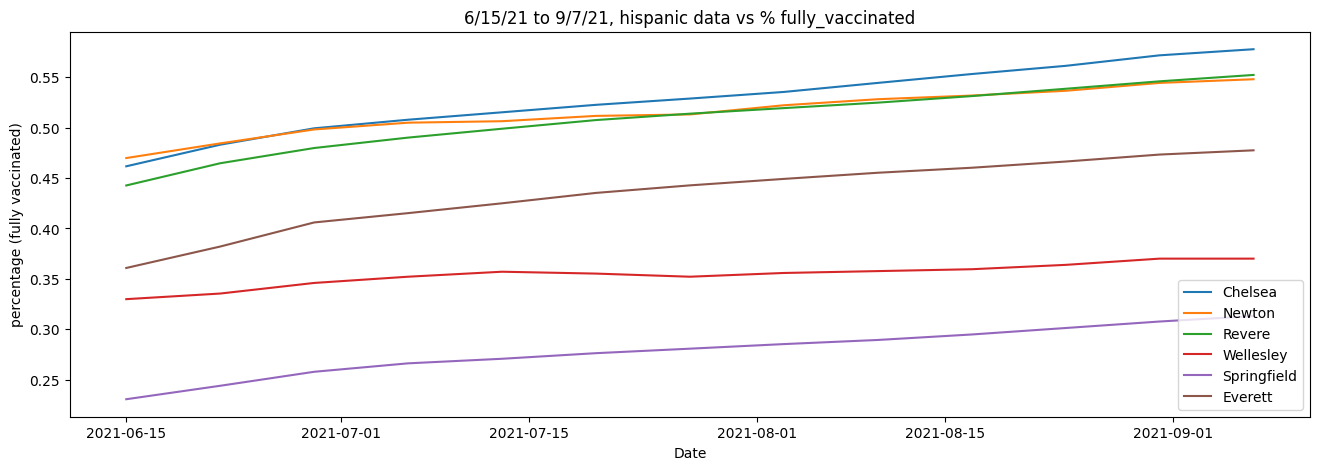

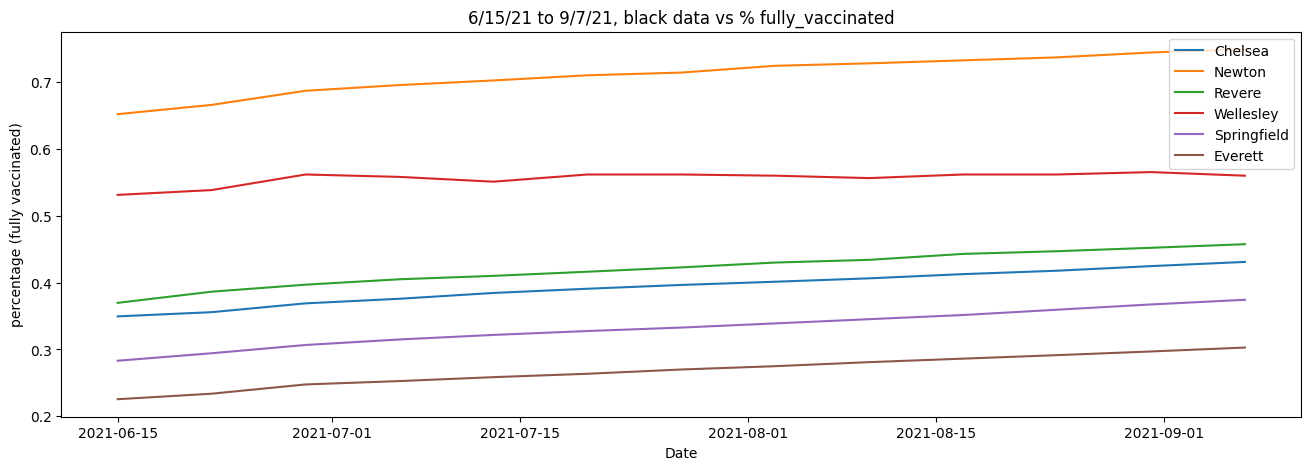

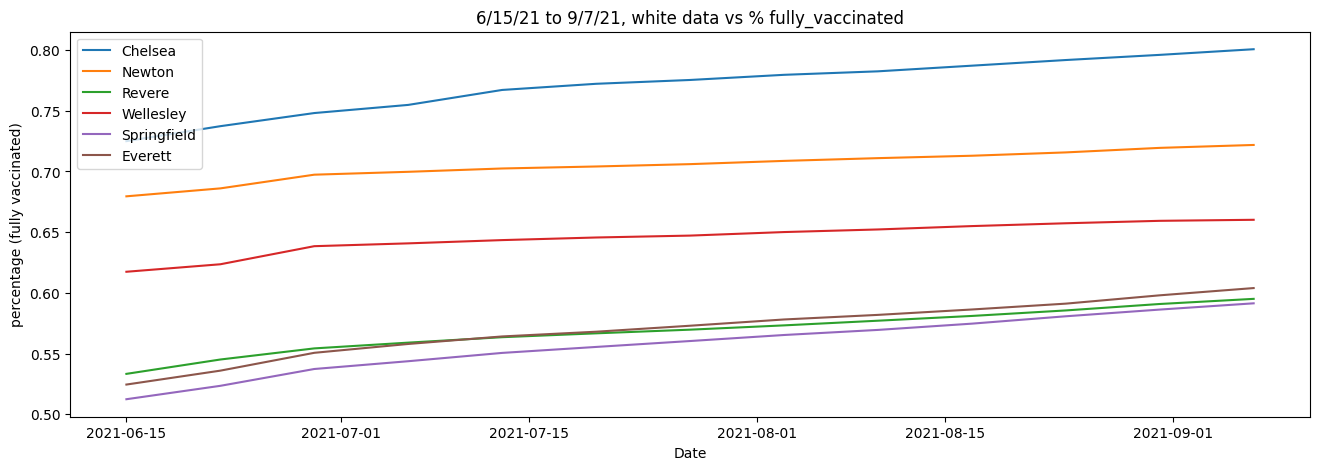

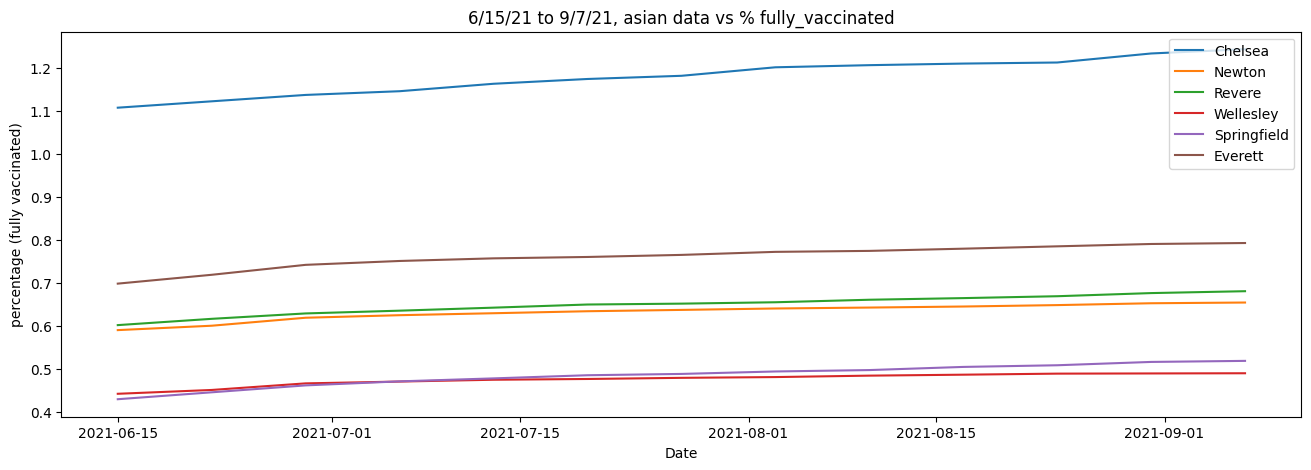

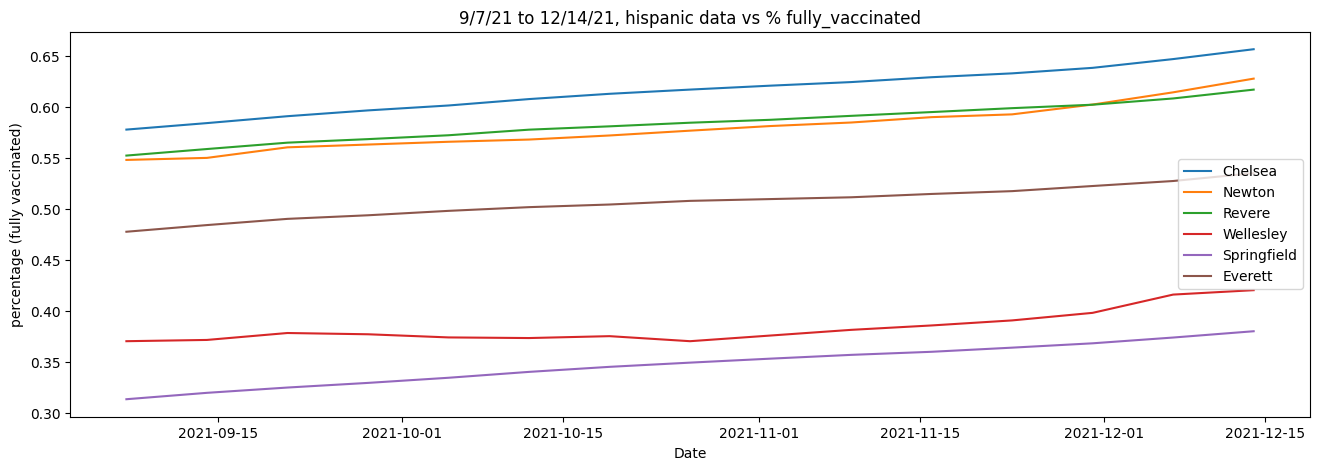

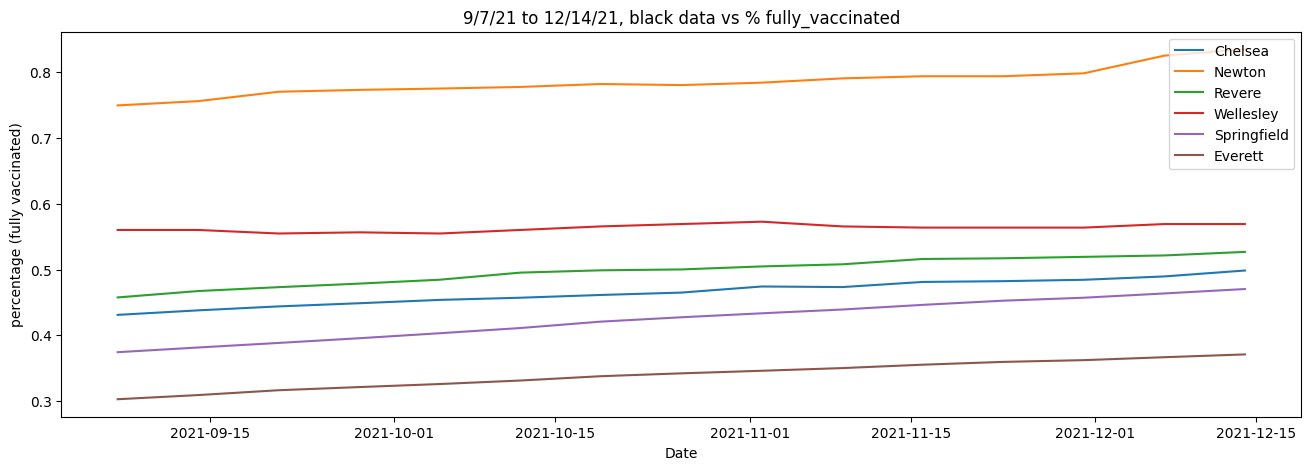

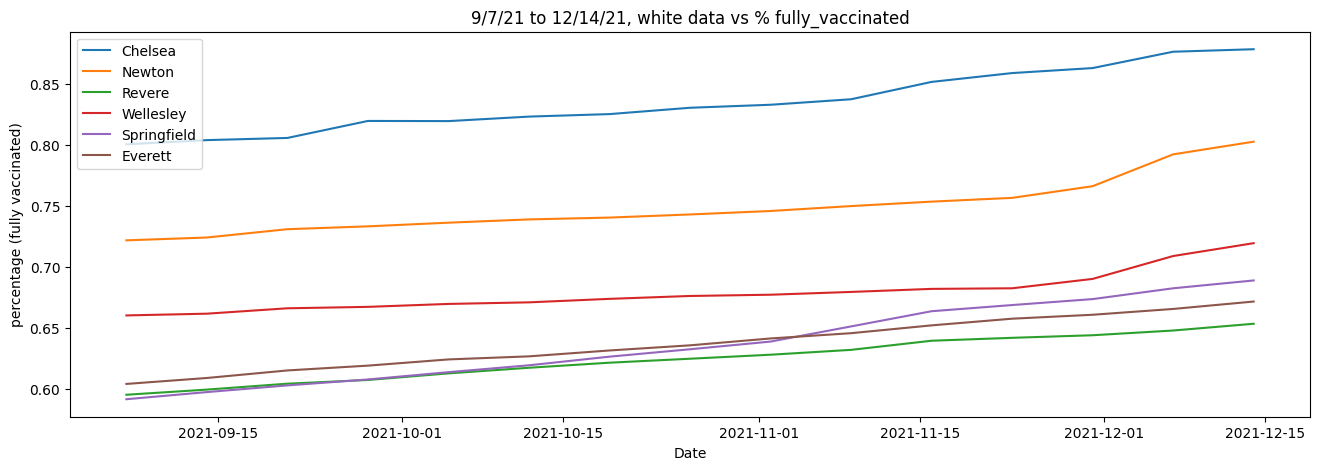

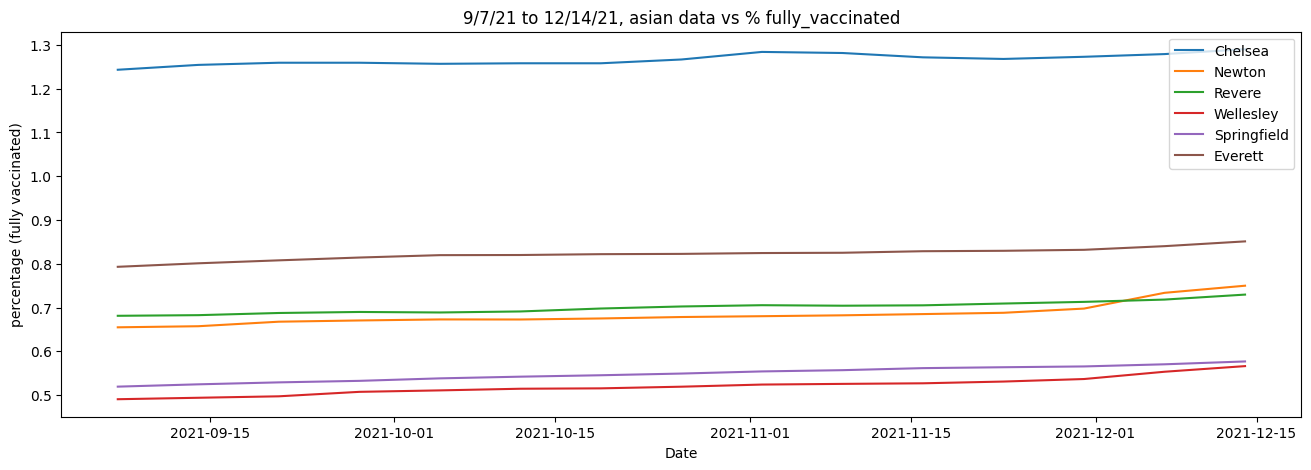

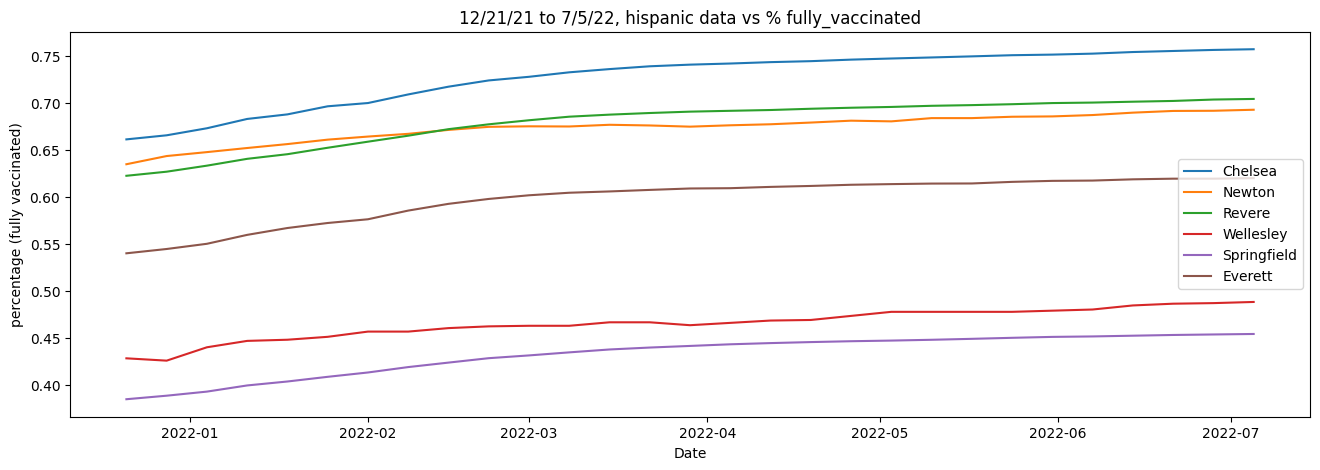

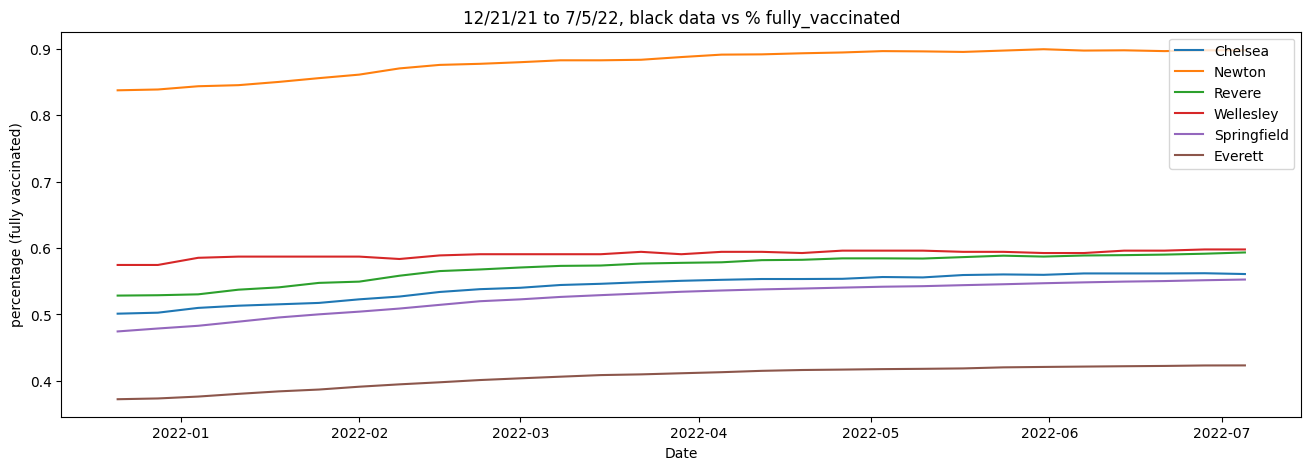

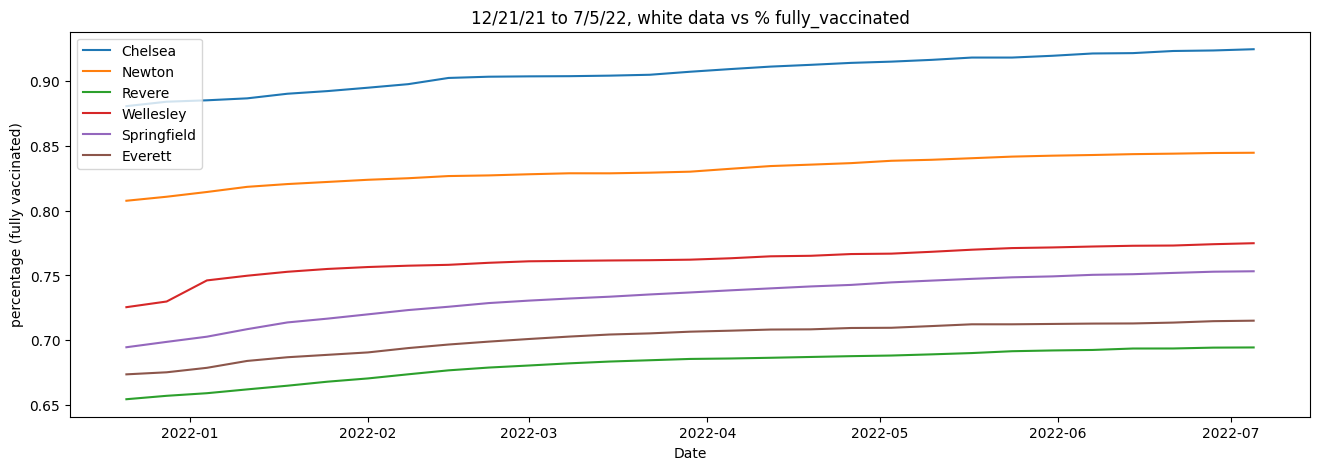

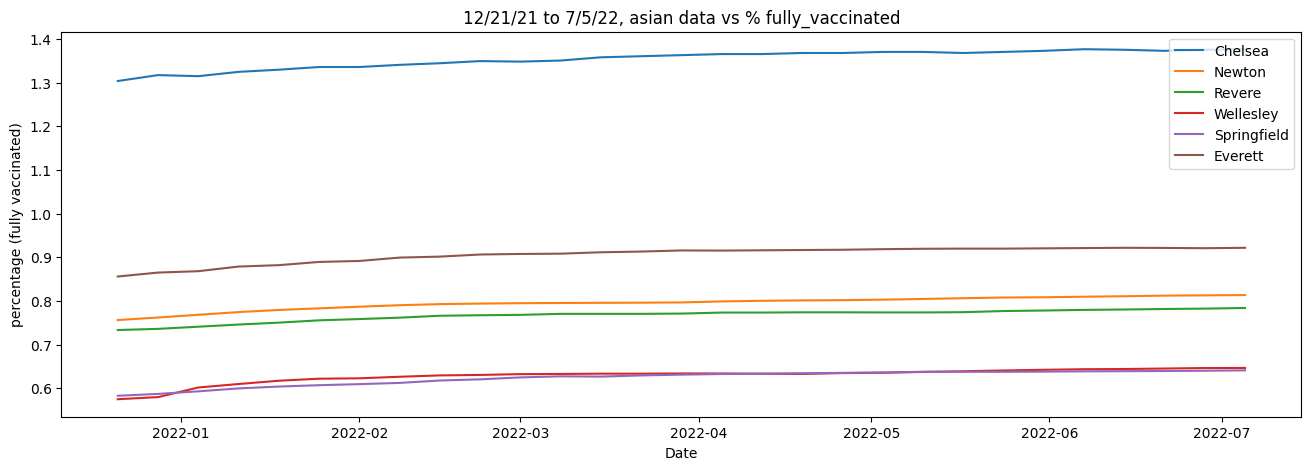

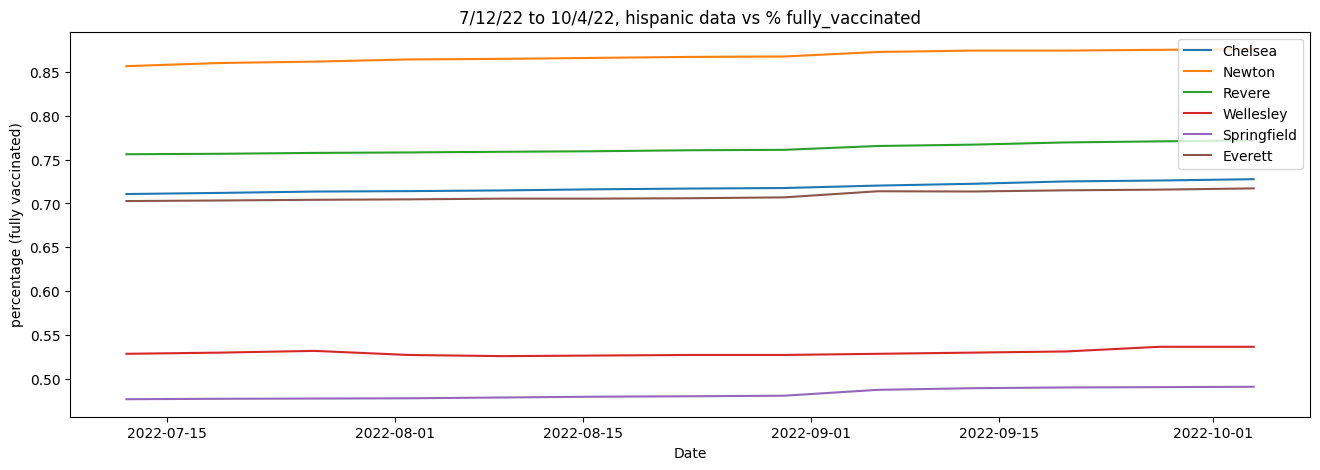

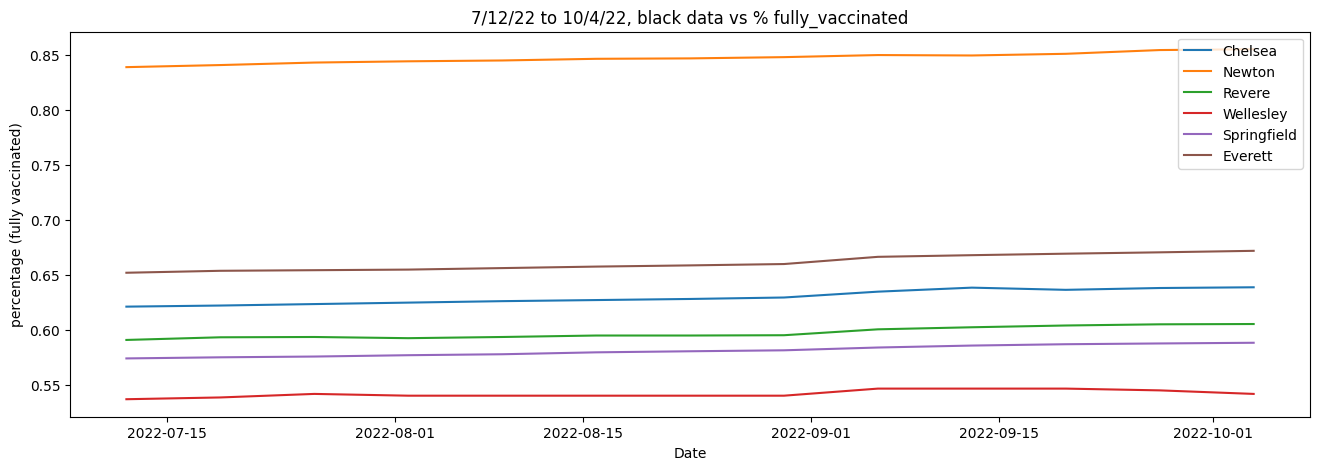

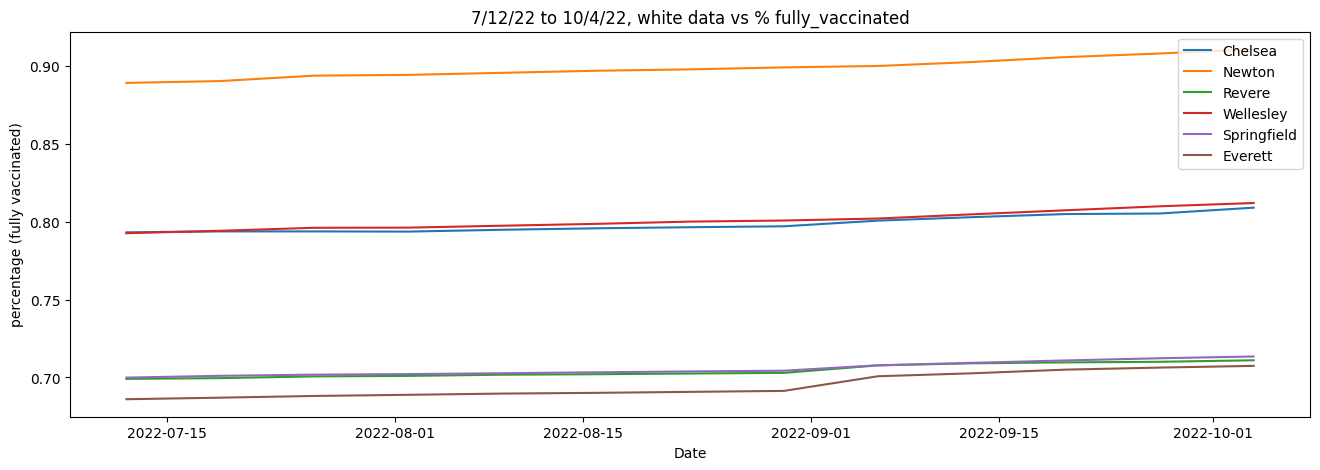

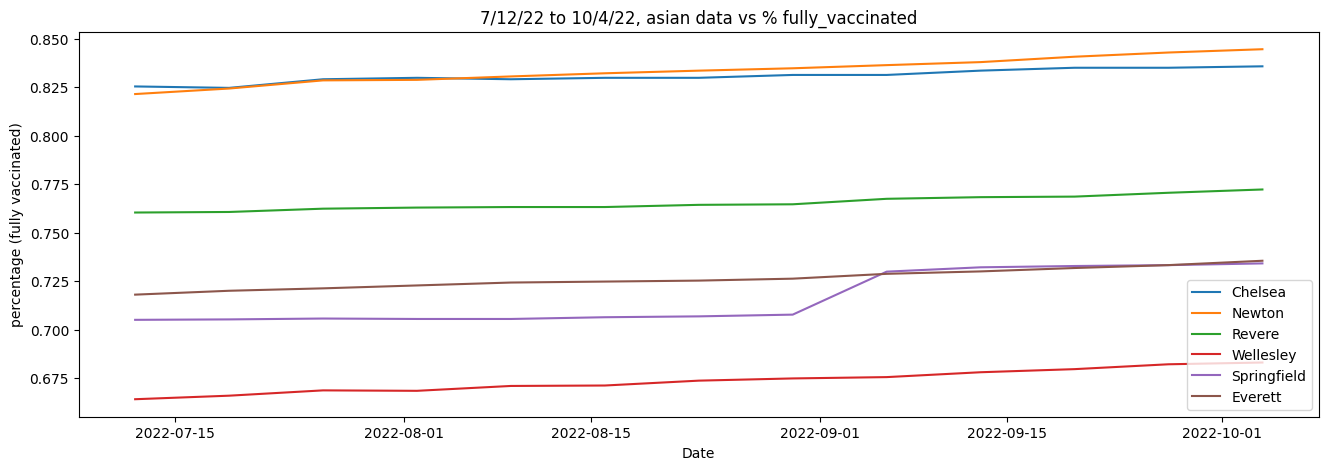

In [7]:
dates = [("3/9/21", "6/8/21"), ("6/15/21", "9/7/21"), ("9/7/21", "12/14/21"), ("12/21/21", "7/5/22"), ("7/12/22", "10/4/22")]
titles = ["hispanic", "black", "white", "asian"]

for datepair in dates:
    for i in range(len(titles)):
        title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs % fully_vaccinated"
        plot_df(racialdata[i], 'percentage (fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])

        

Plotting change in % fully vaccinated against entire timeline. We find that the change in the very beginning (early march to mid march 2021) is significantly different than the changes in the rest of the timeline.

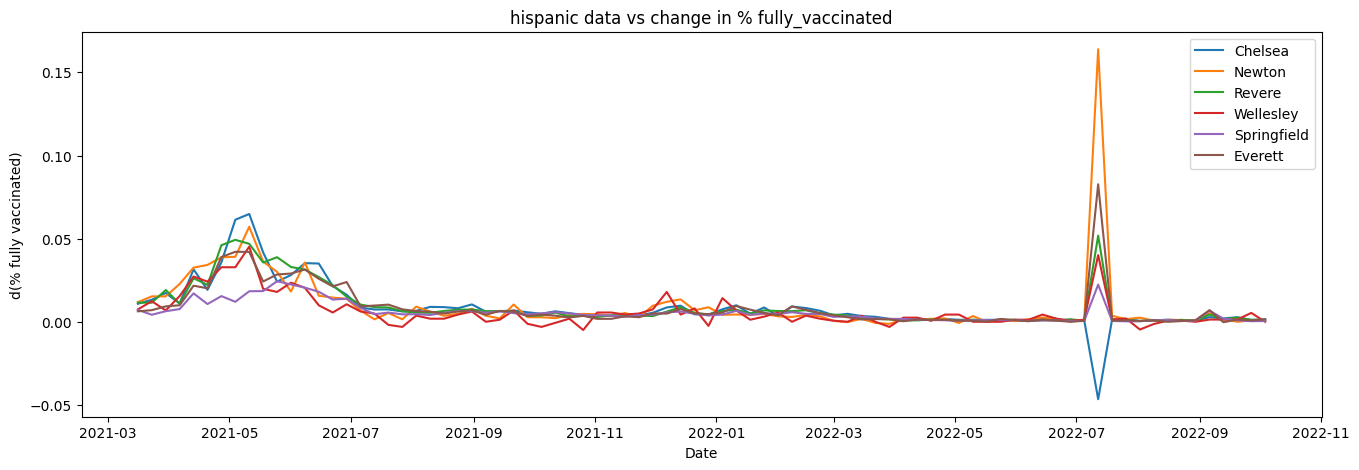

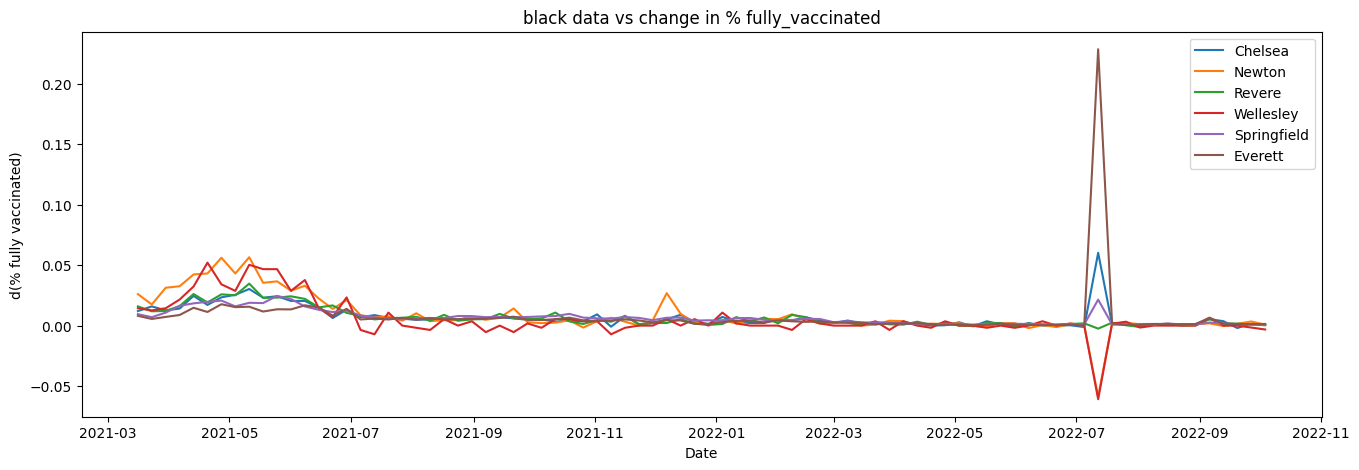

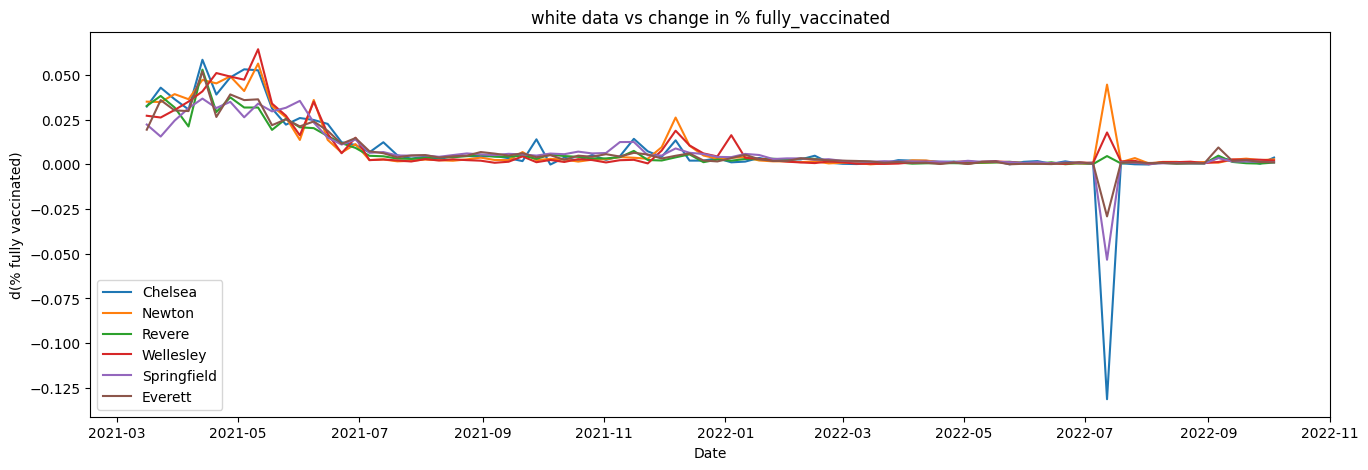

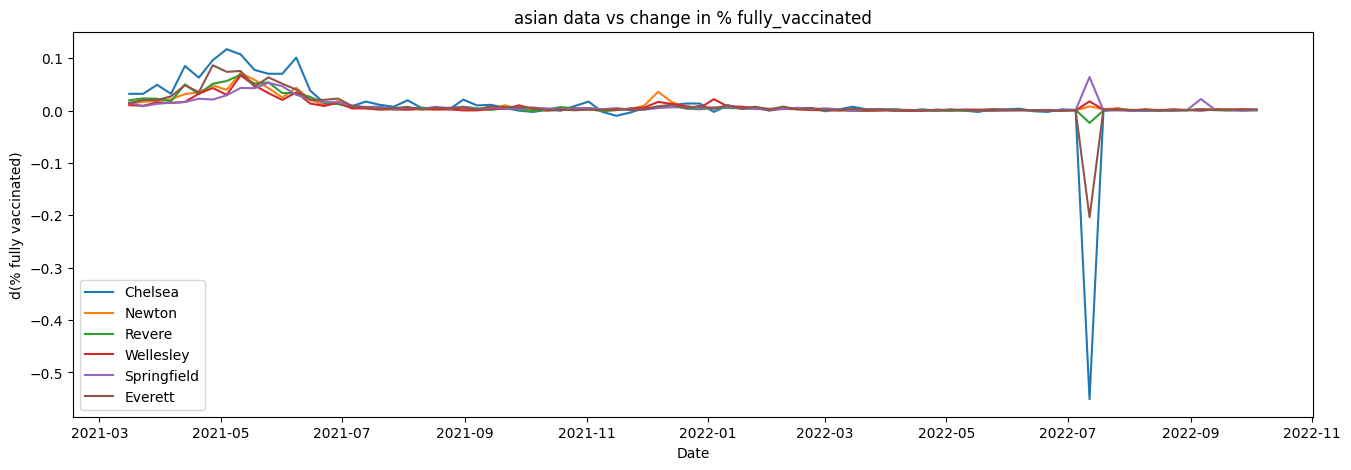

In [8]:
plot_df(racialdata[0], 'd(% fully vaccinated)', title = 'hispanic data vs change in % fully_vaccinated', beginning = "03/10/2021")
plot_df(racialdata[1], 'd(% fully vaccinated)', title = 'black data vs change in % fully_vaccinated', beginning = "03/10/2021")
plot_df(racialdata[2], 'd(% fully vaccinated)', title = 'white data vs change in % fully_vaccinated', beginning = "03/10/2021")
plot_df(racialdata[3], 'd(% fully vaccinated)', title = 'asian data vs change in % fully_vaccinated', beginning = "03/10/2021")


Seeing the ground zero of vaccine rollout is very different, cut early vaccine rollout timeline section into another part - 03/01/21 to 03/15/21

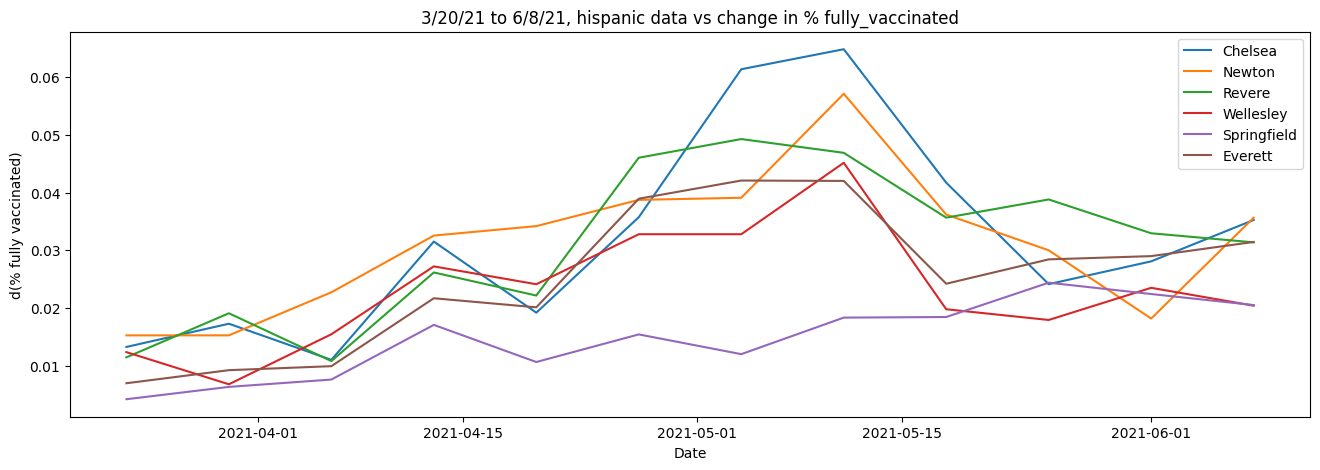

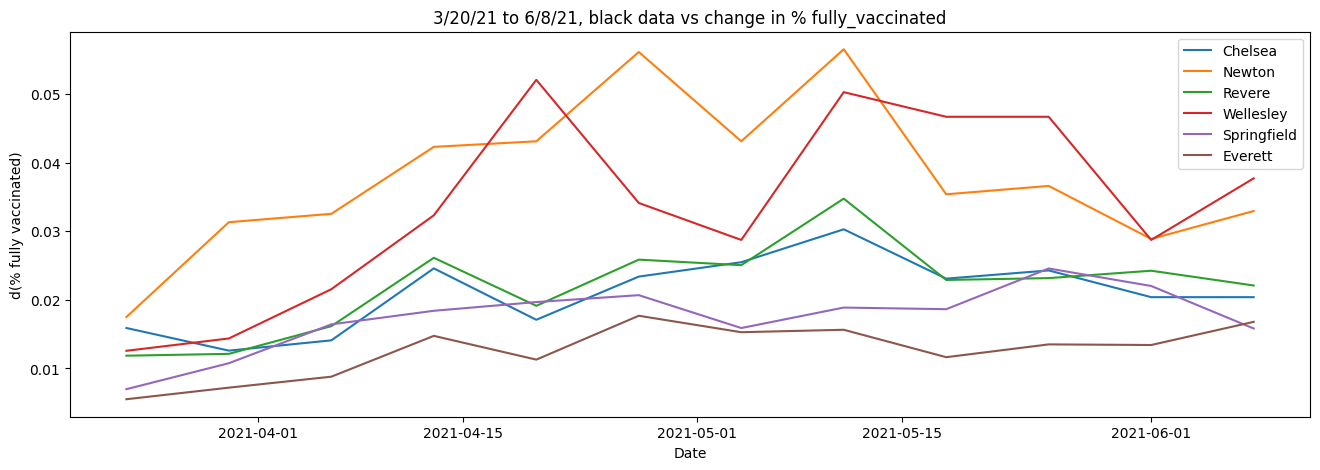

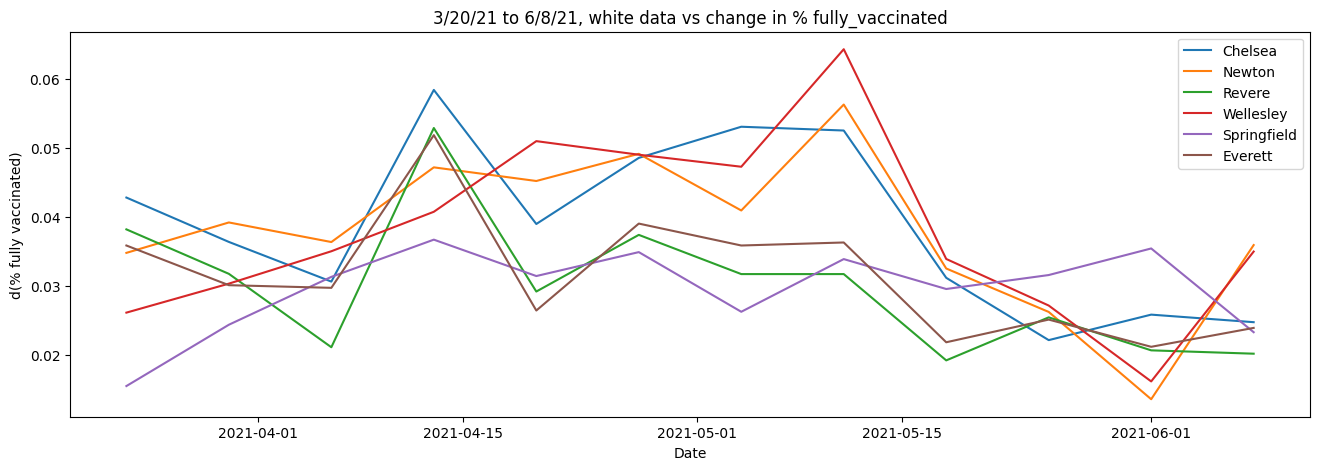

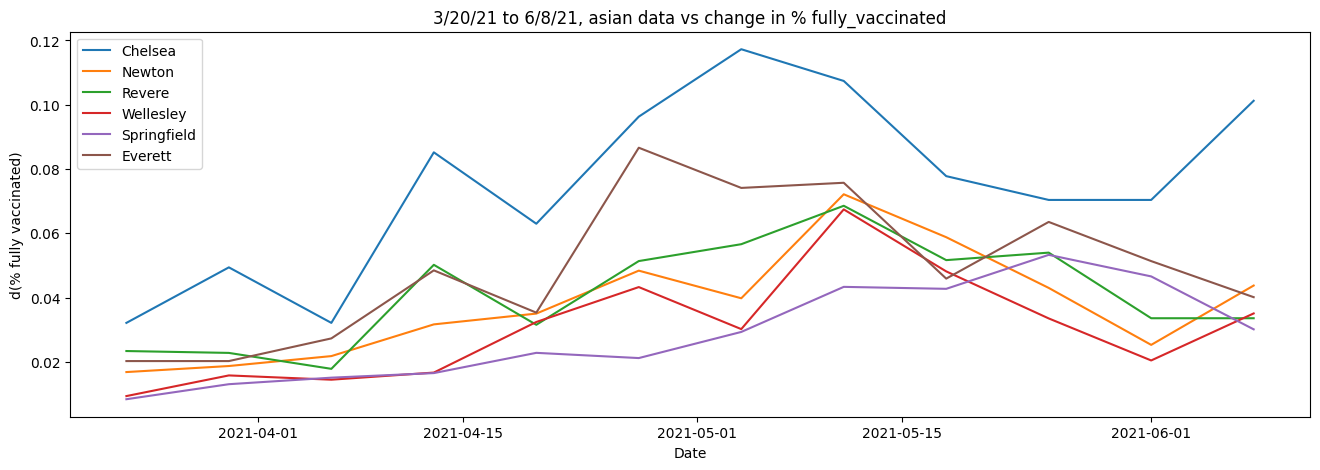

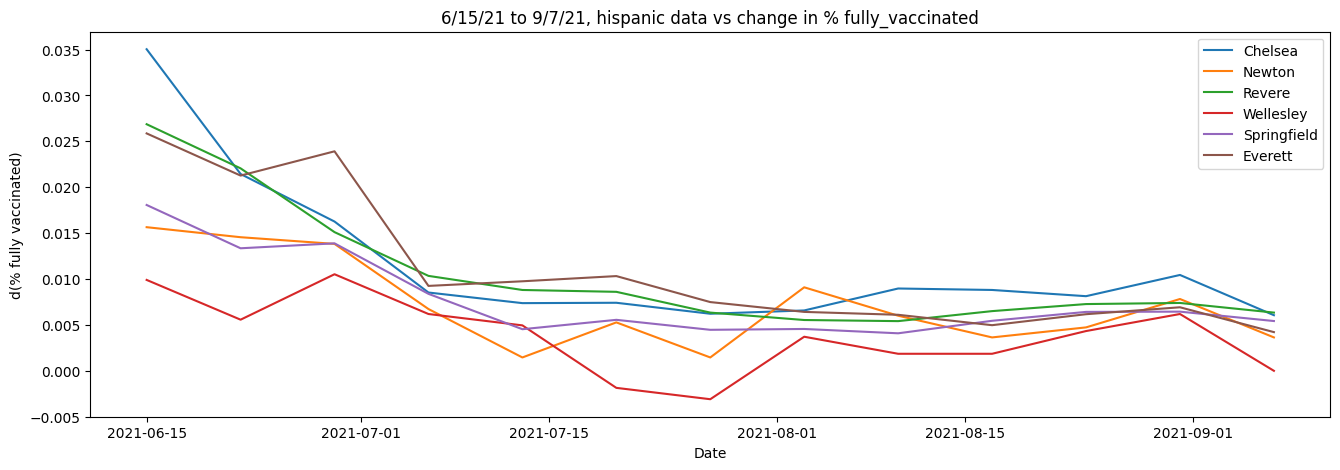

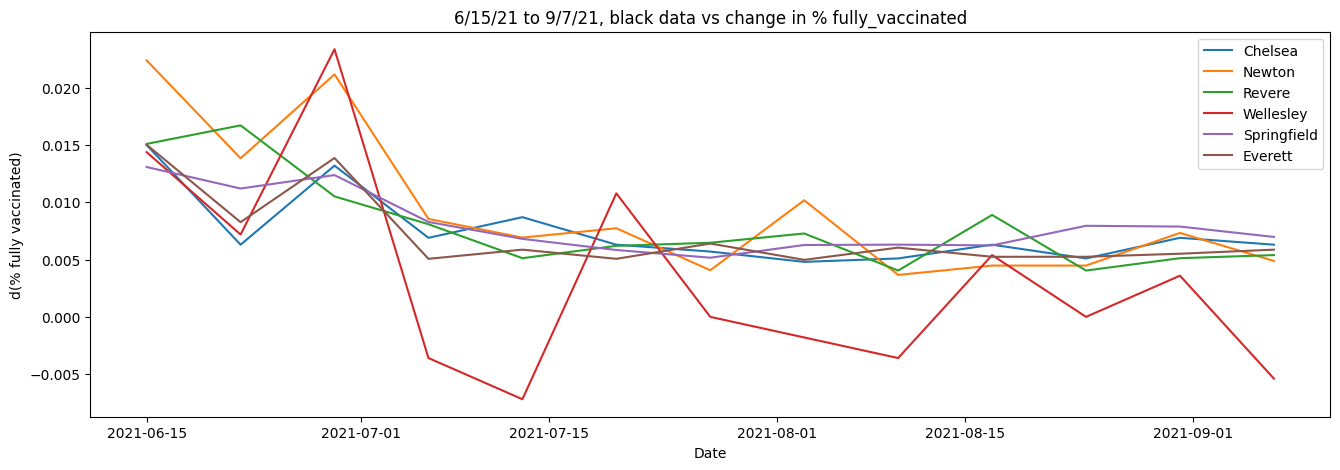

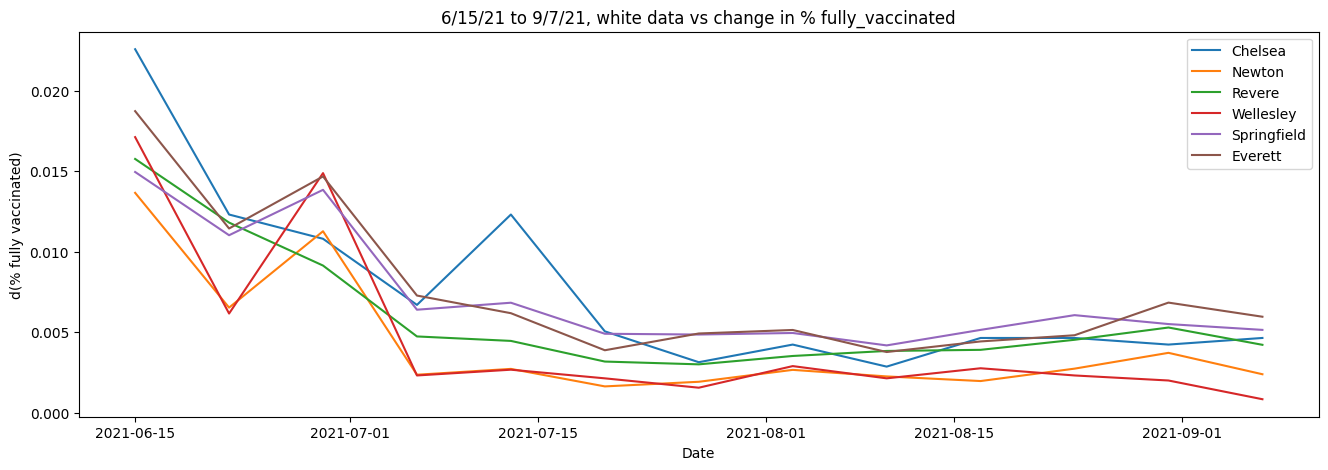

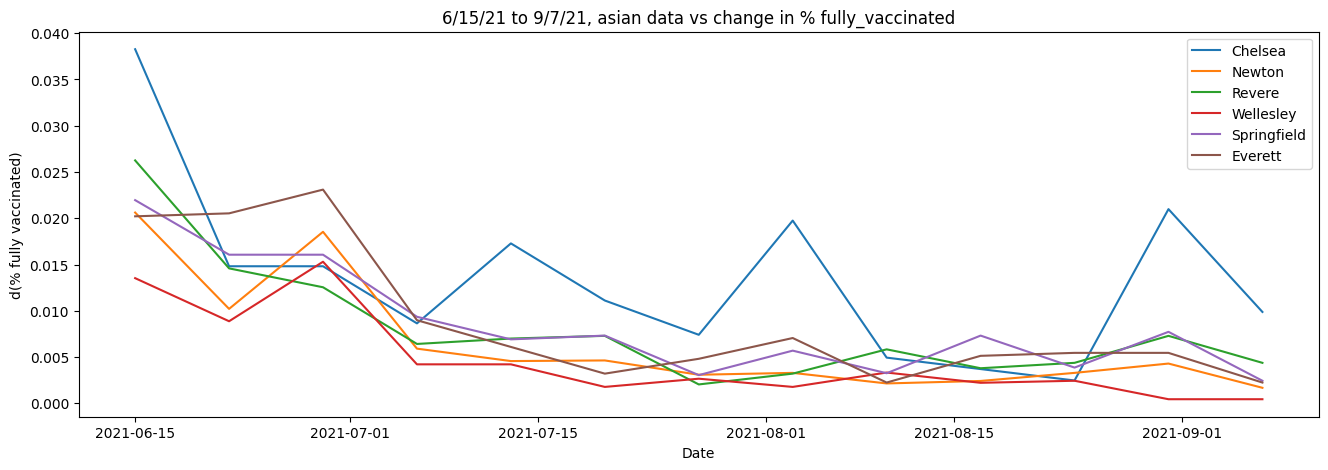

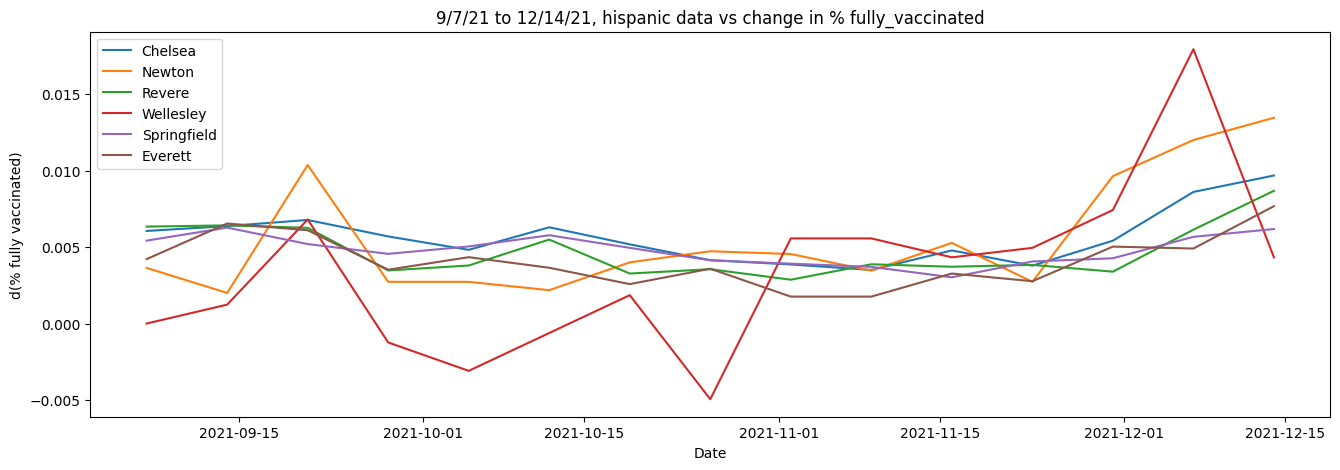

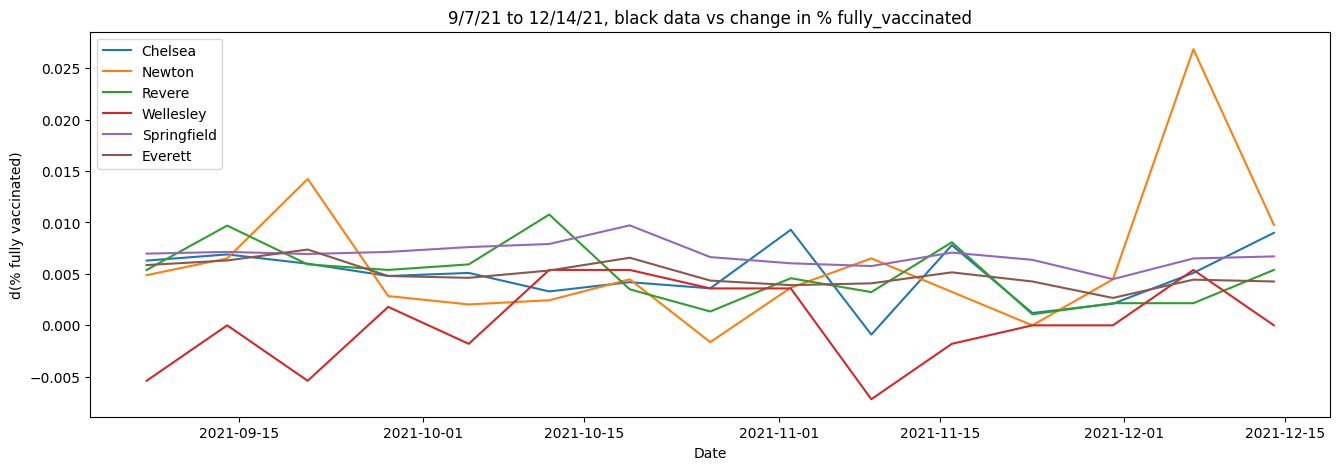

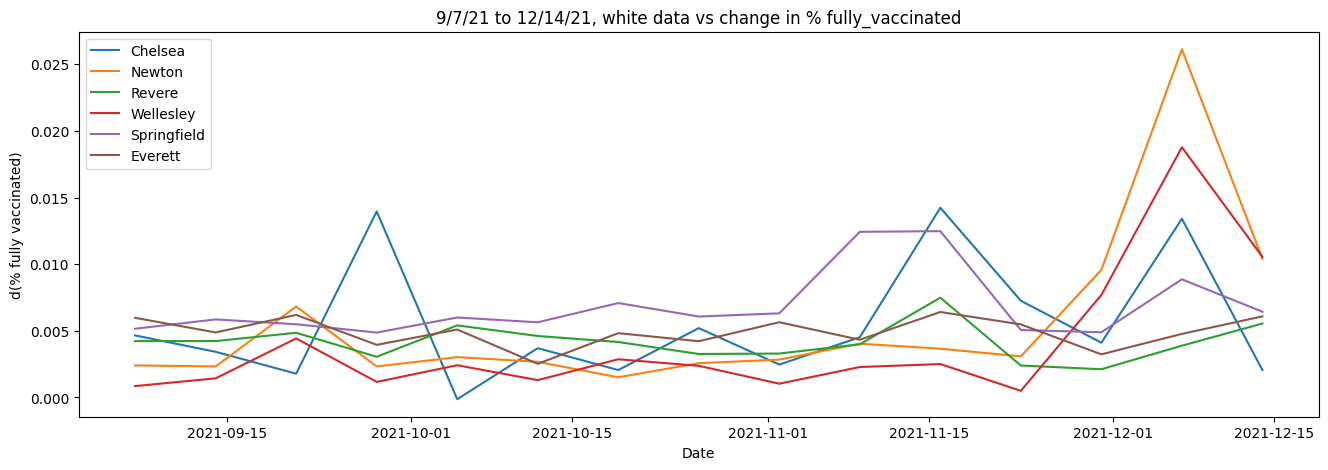

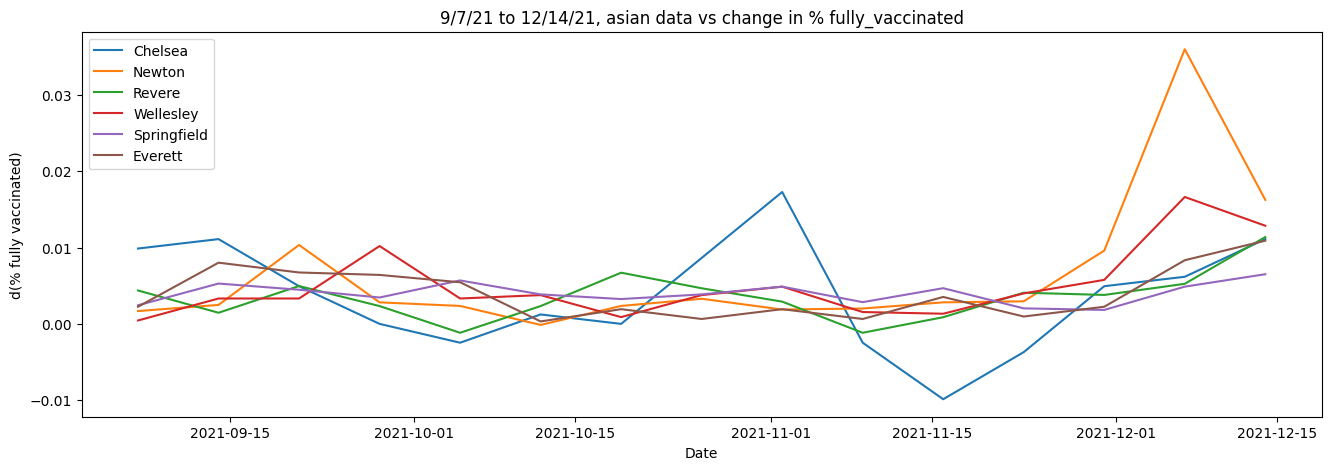

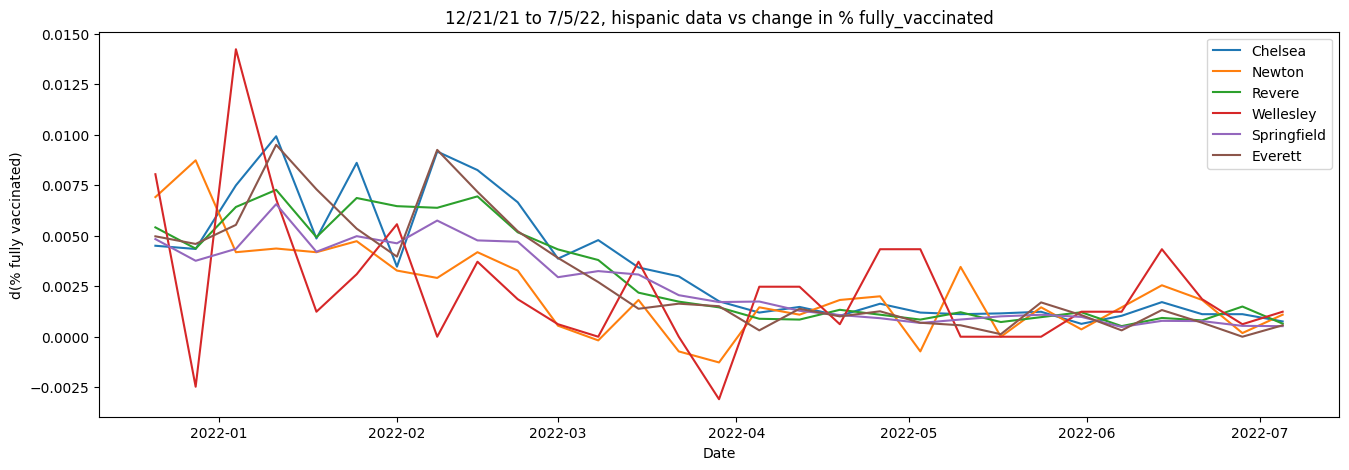

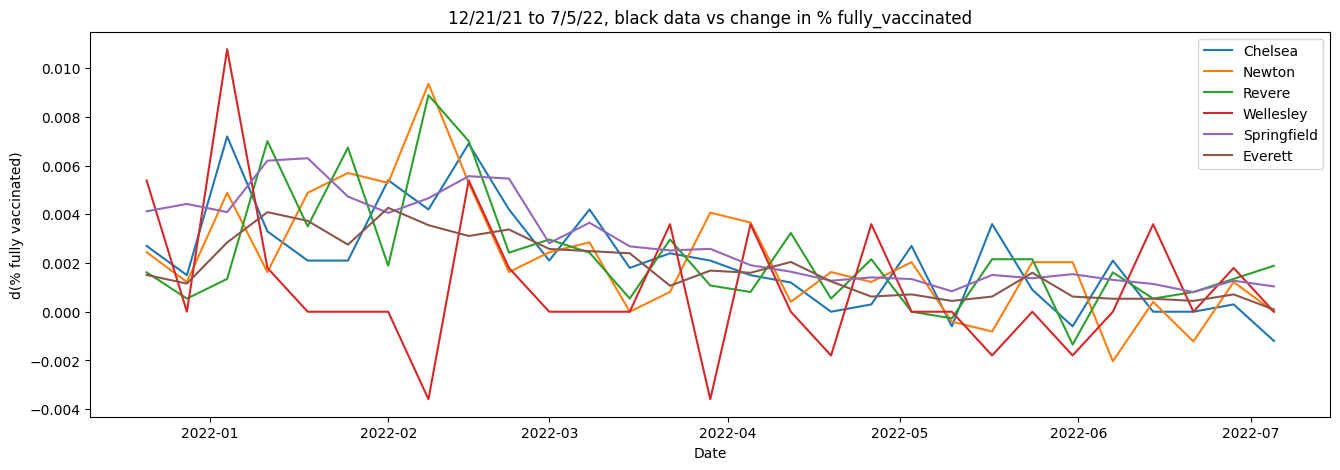

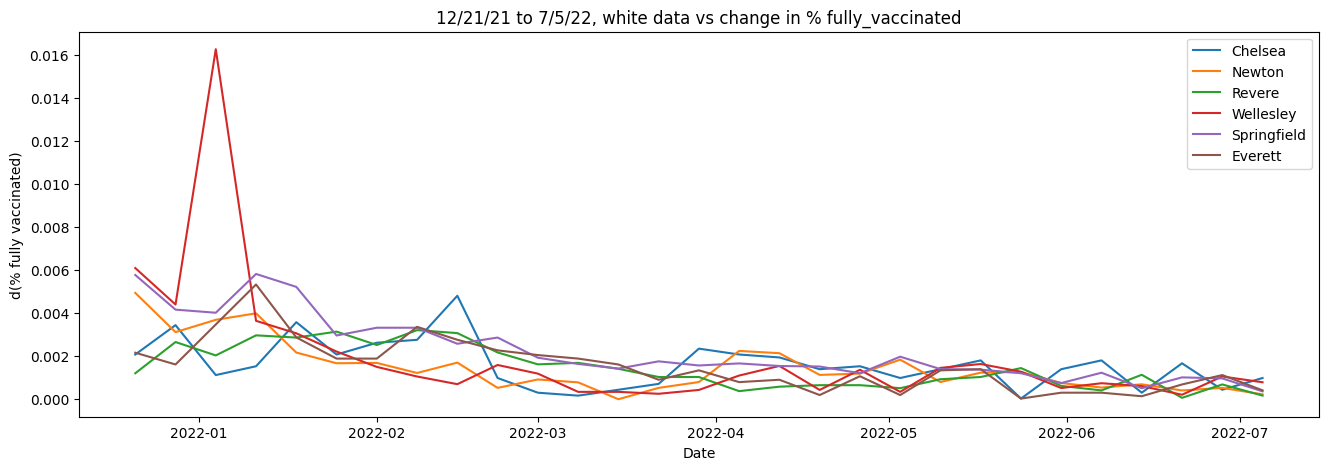

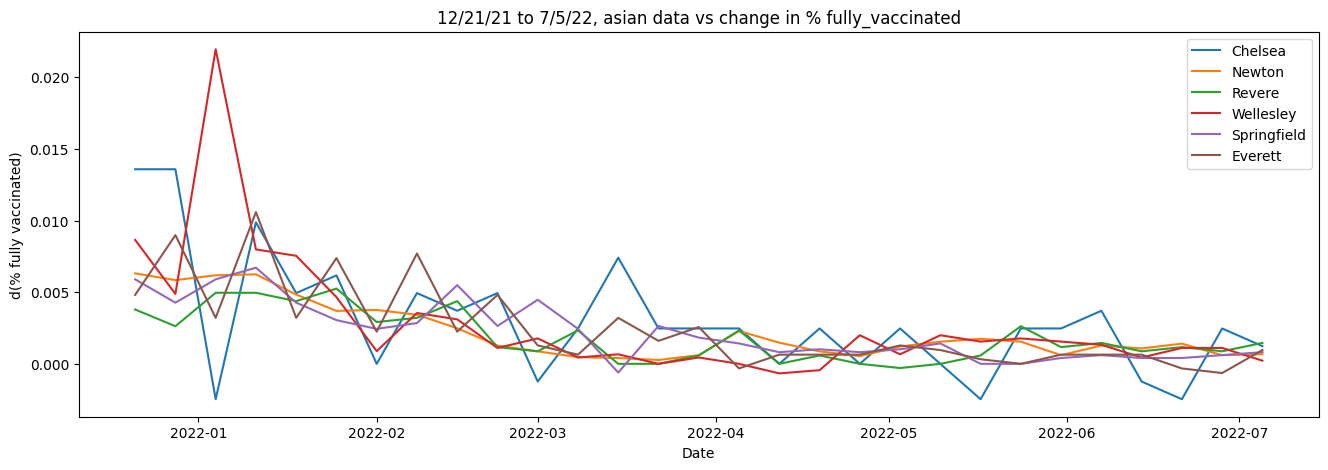

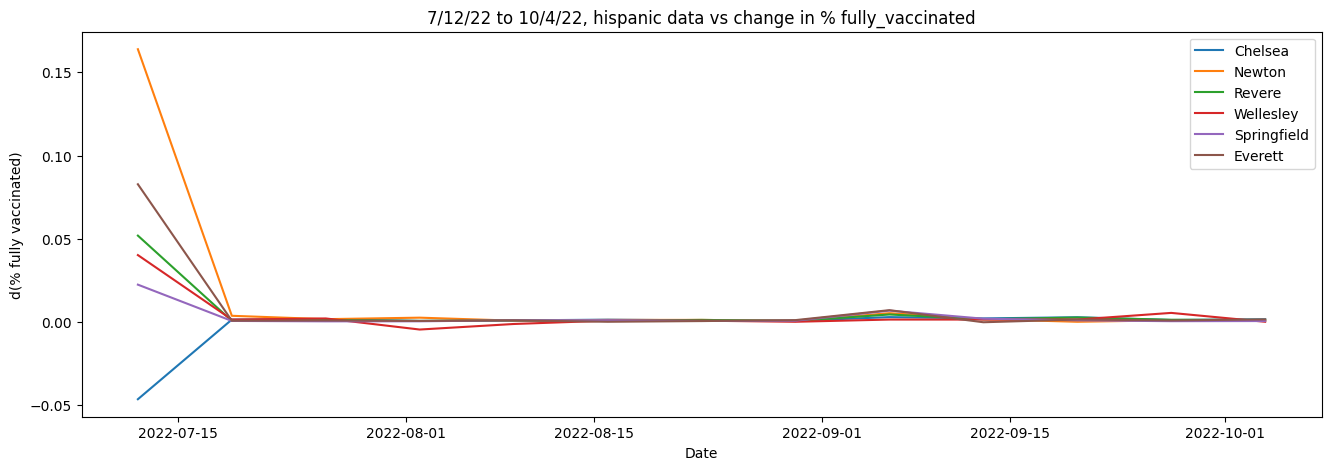

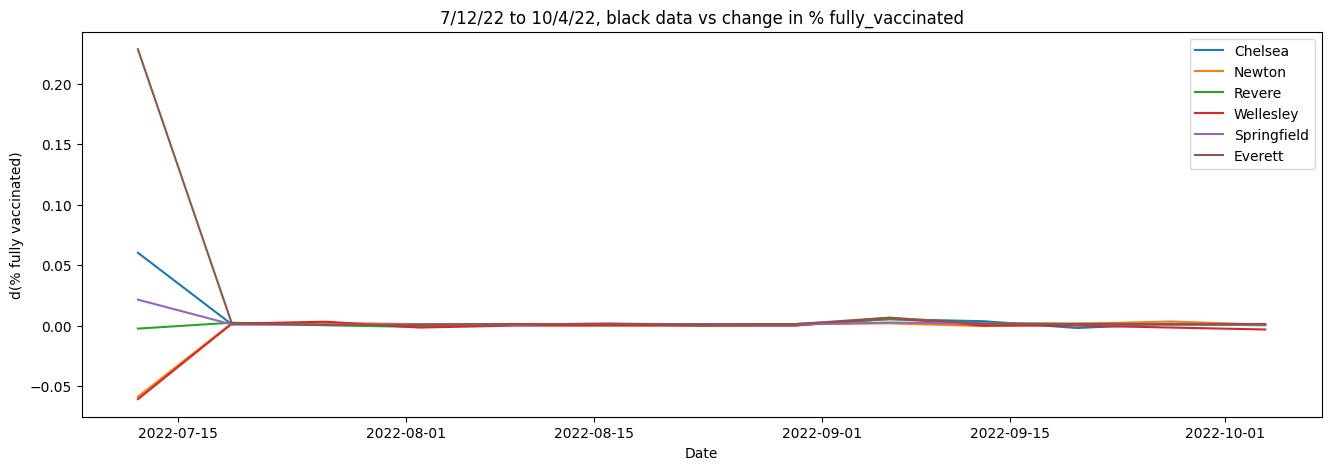

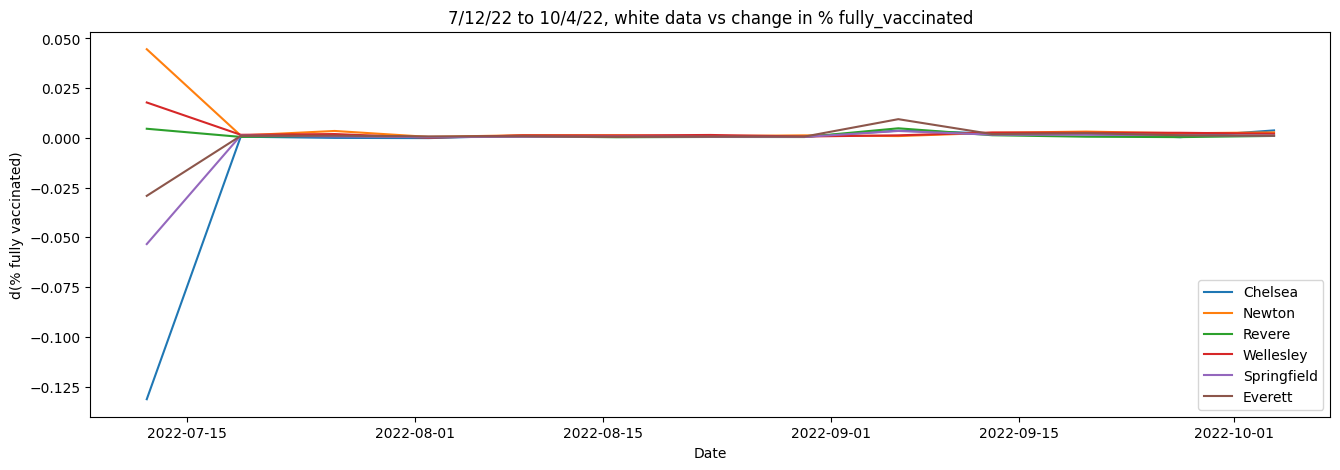

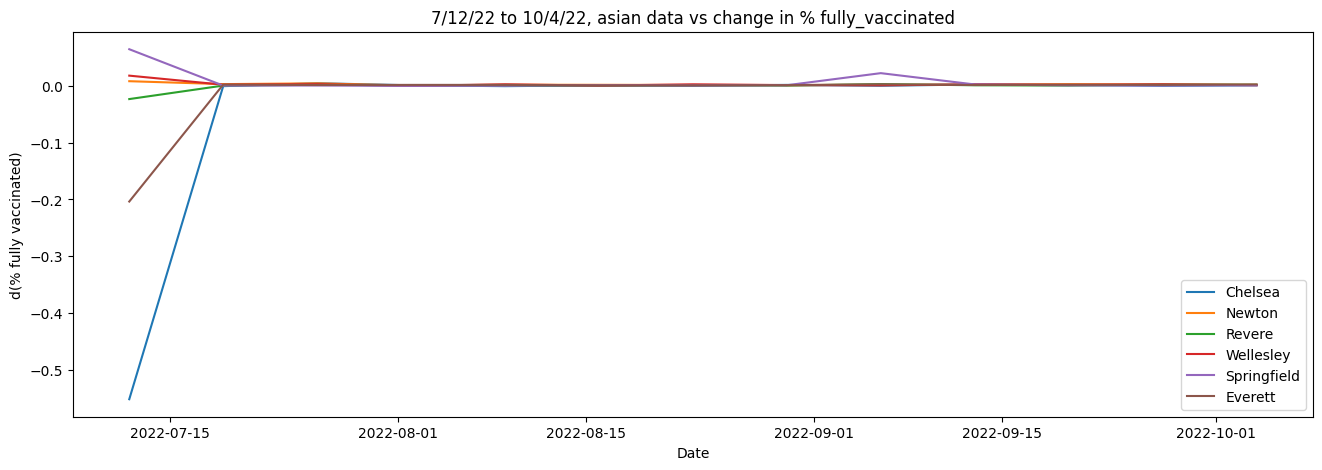

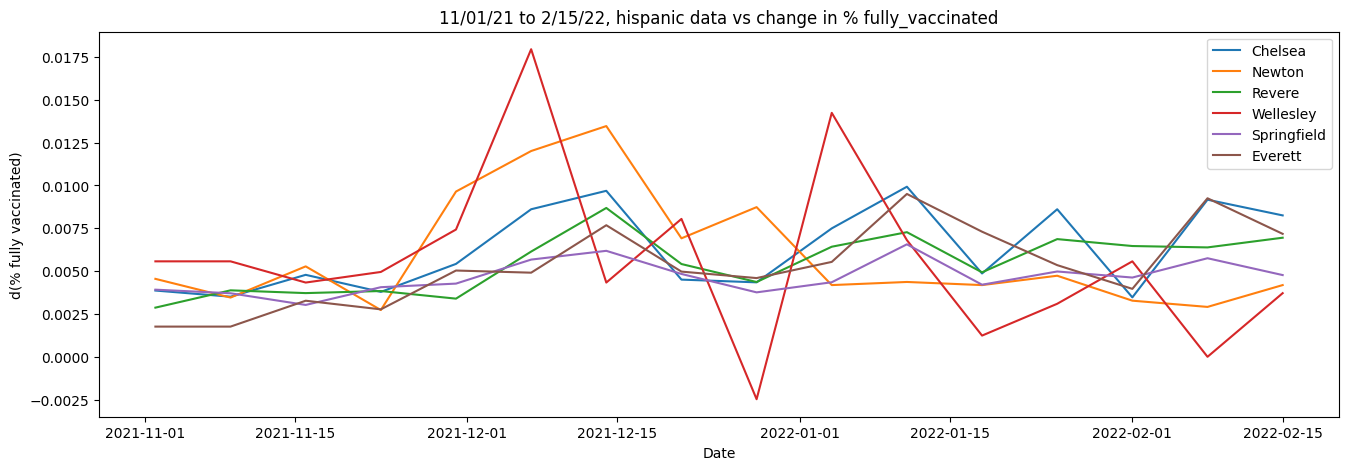

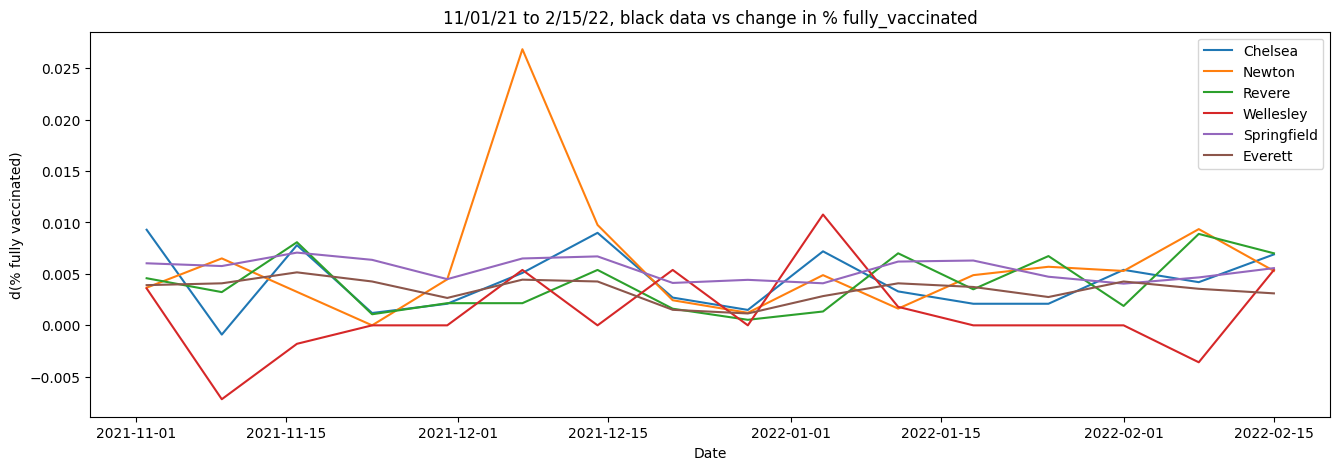

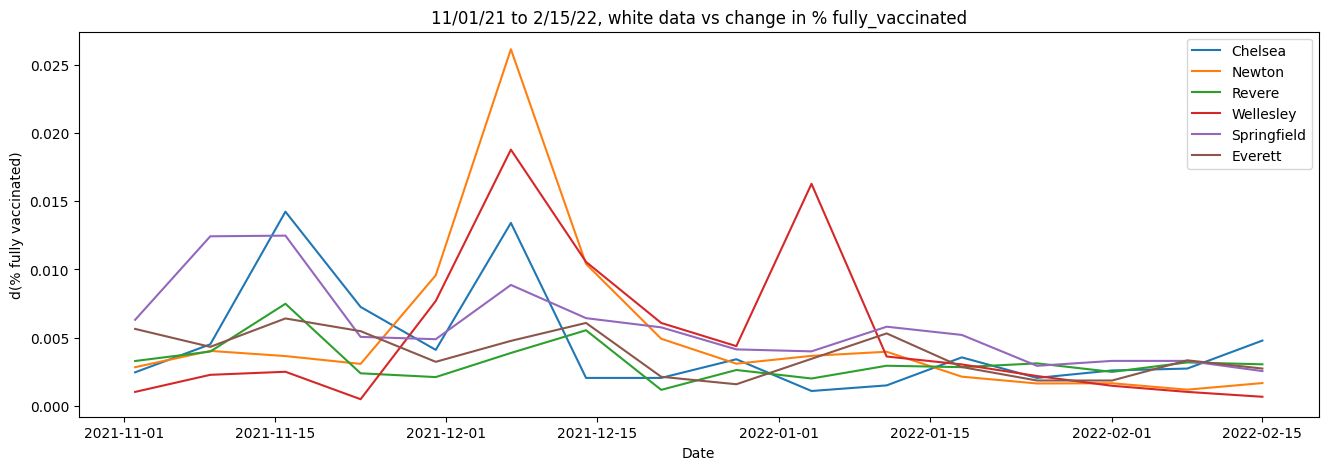

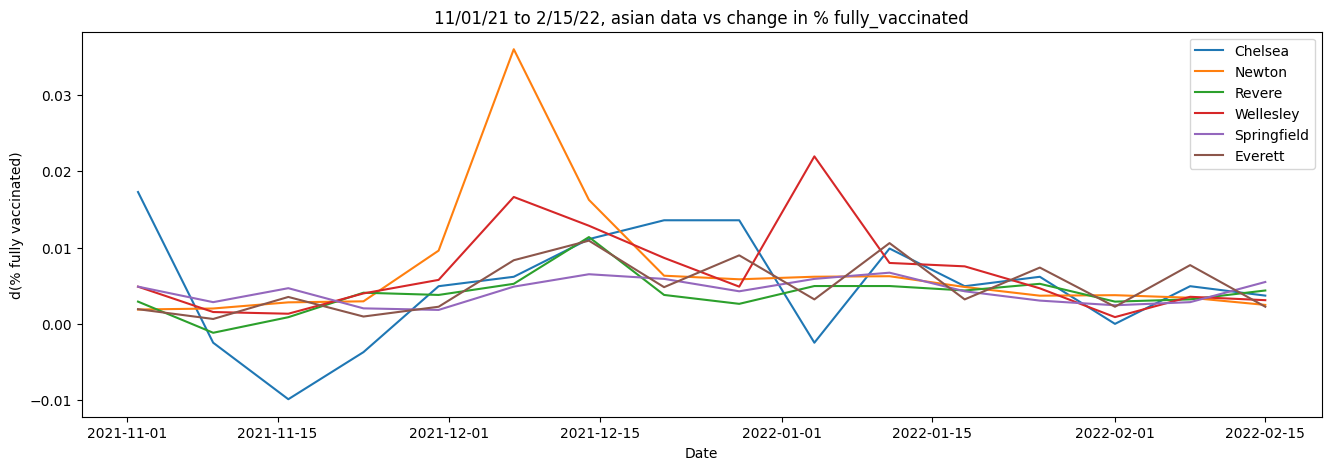

In [19]:
dates = [("3/20/21", "6/8/21"), ("6/15/21", "9/7/21"), ("9/7/21", "12/14/21"), ("12/21/21", "7/5/22"), ("7/12/22", "10/4/22"), ("11/01/21", "2/15/22")]

for datepair in dates:
# datepair = dates[0]
    for i in range(len(titles)):
        title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
        plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


Seems like Chelsea's rate of change in % fully vaccinated doesn't seem to change, while the other cities seem to drop off slightly within initial vaccine rollout.

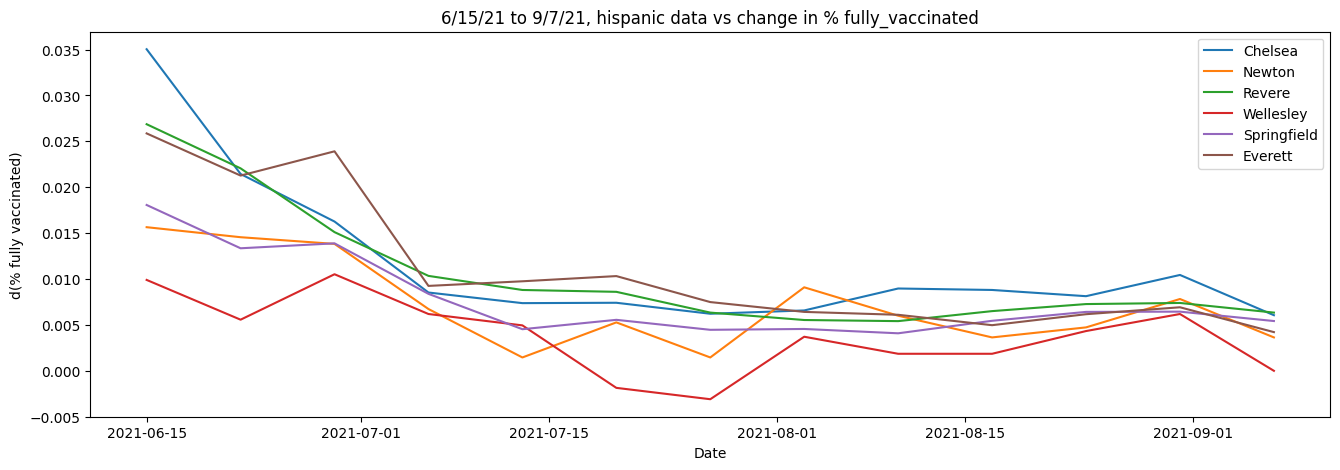

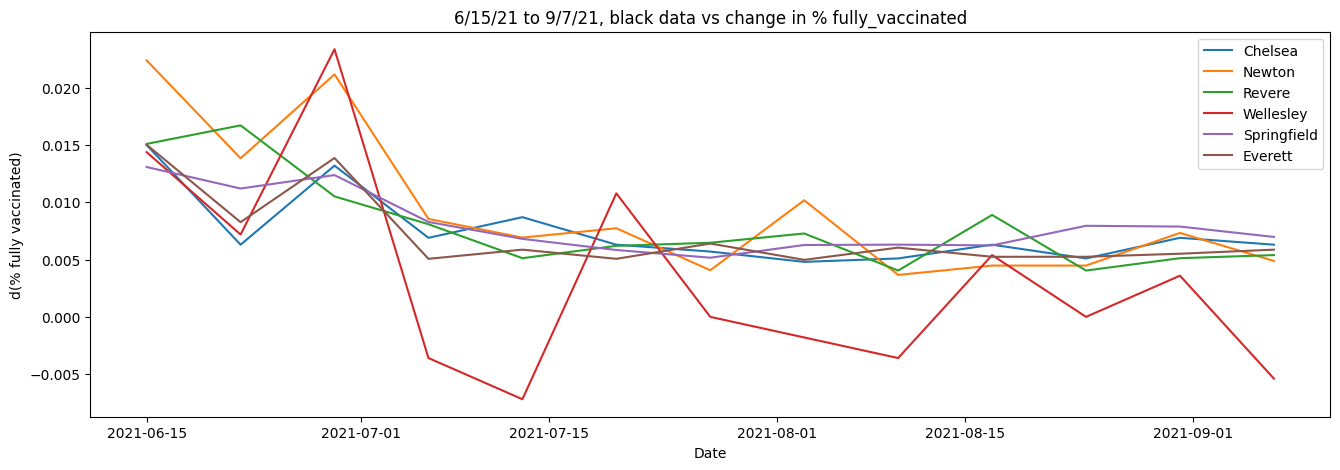

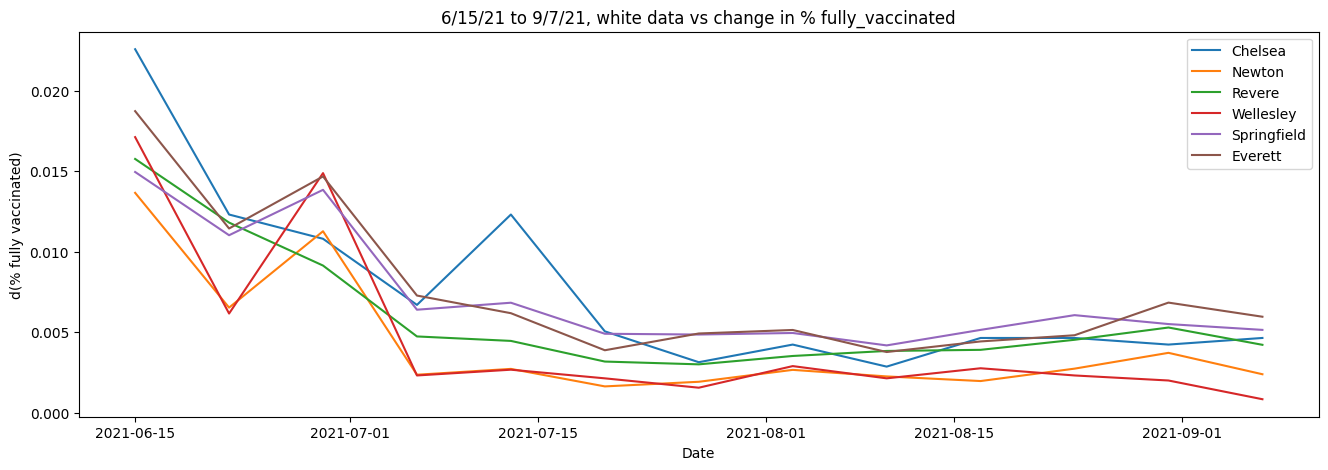

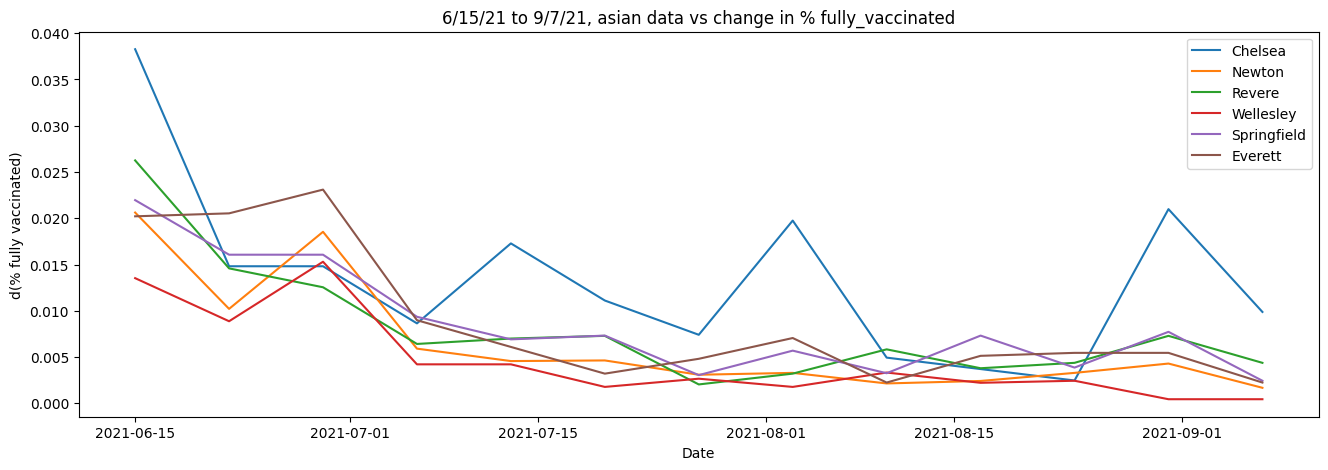

In [10]:
datepair = dates[1]
for i in range(len(titles)):
    title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
    plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


It appears there are two significant points here resulting in spikes to fully vaccination rate - the first being around 04/06/2021, and the second 05/04/2021. 

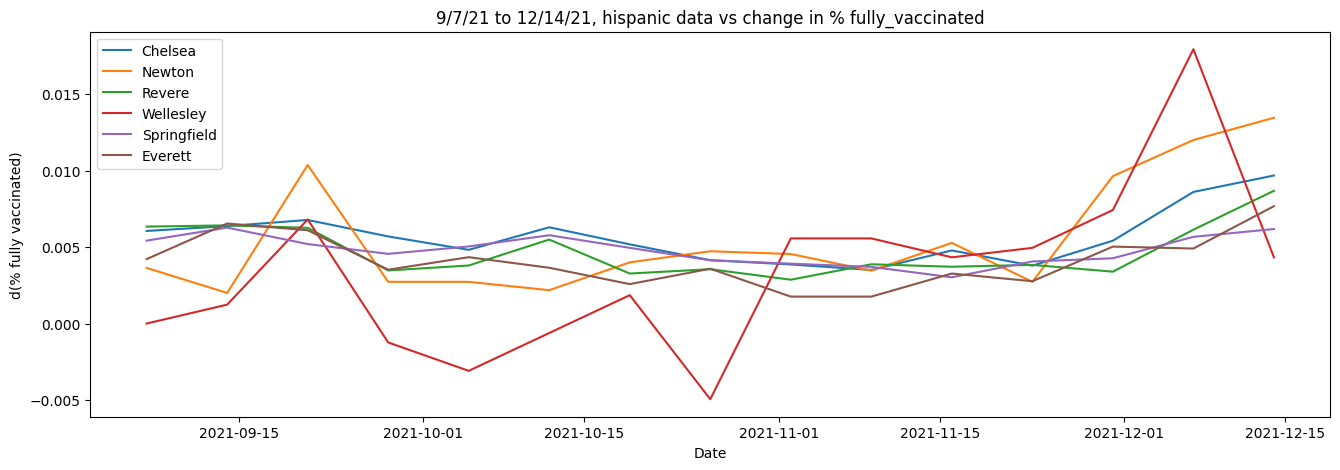

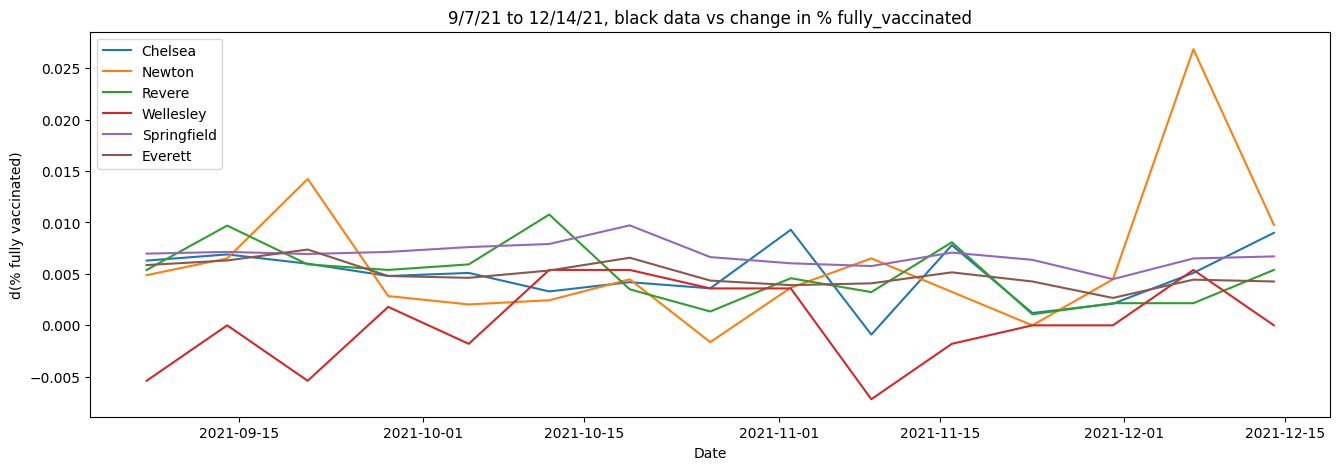

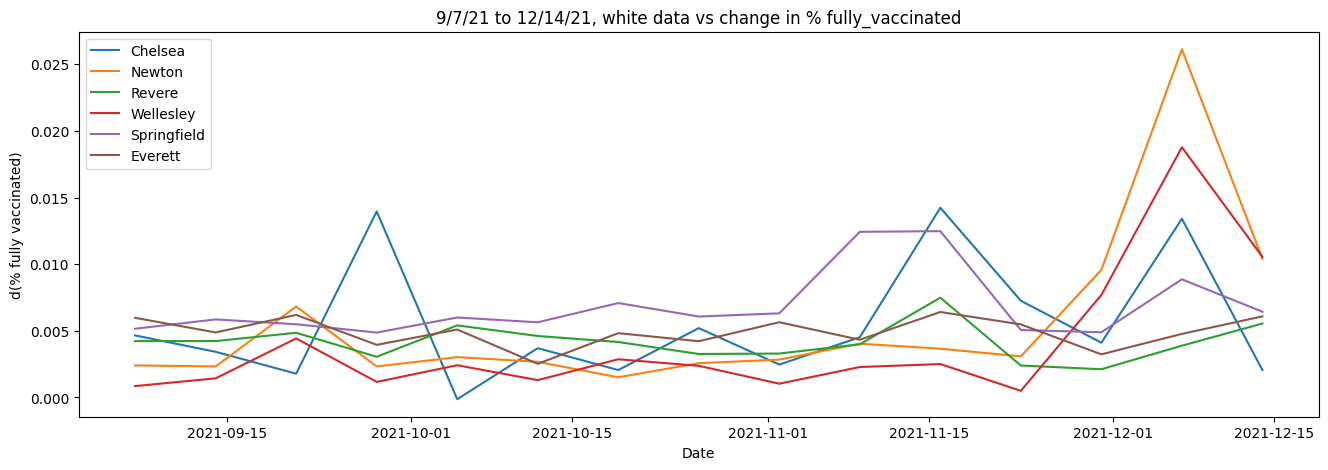

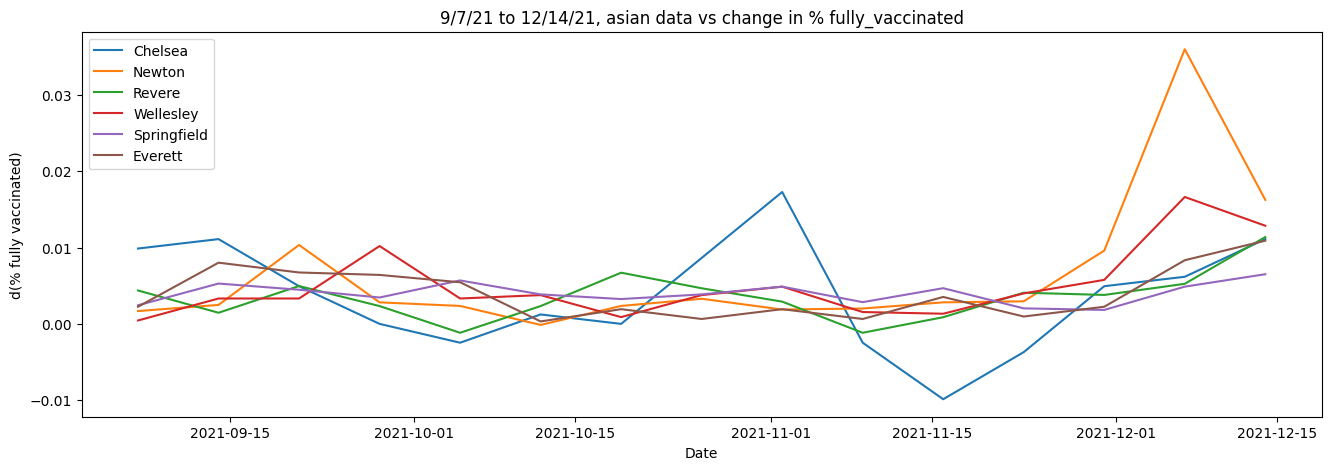

In [11]:
datepair = dates[2]
for i in range(len(titles)):
    title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
    plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


In this time period of 6/15/21 to 9/8/21, it seems like the change in % fully vaccination rate seems to be decreasing steadily. One possible event here is 06/08/2021 as there seems to be a minor spike in the change of vaccination rate.

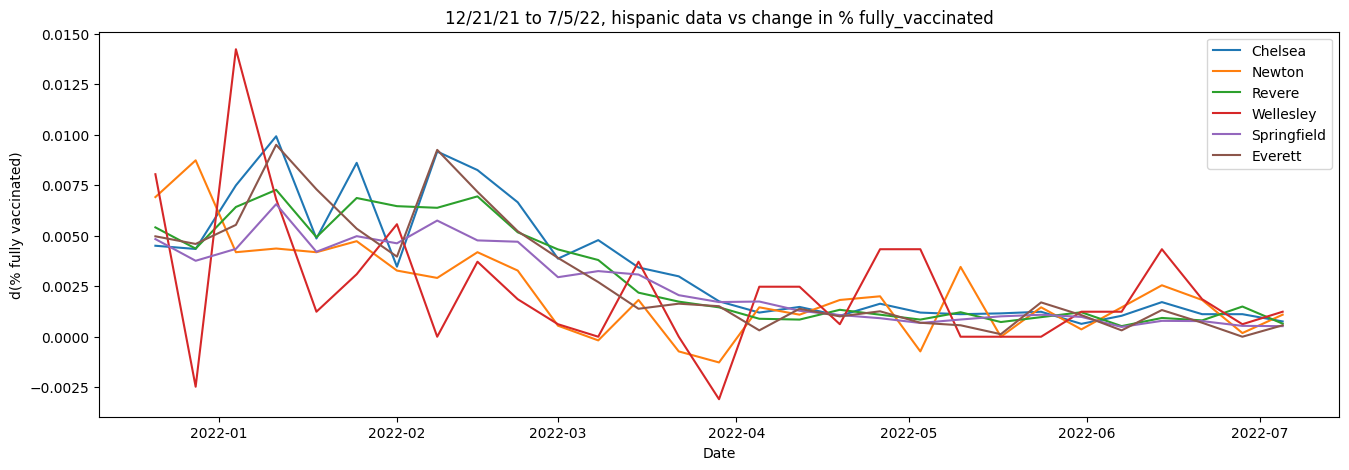

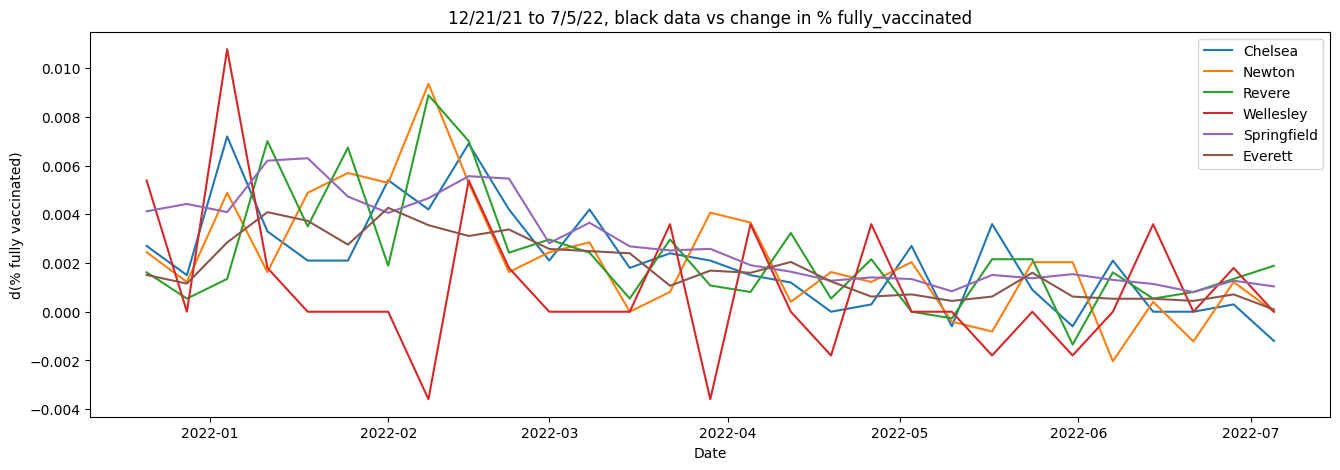

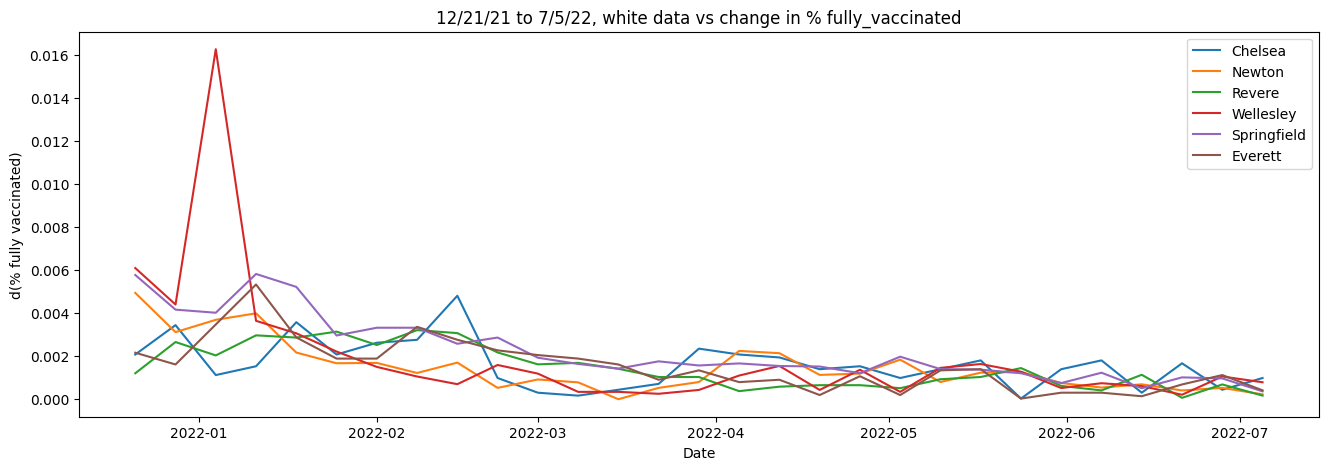

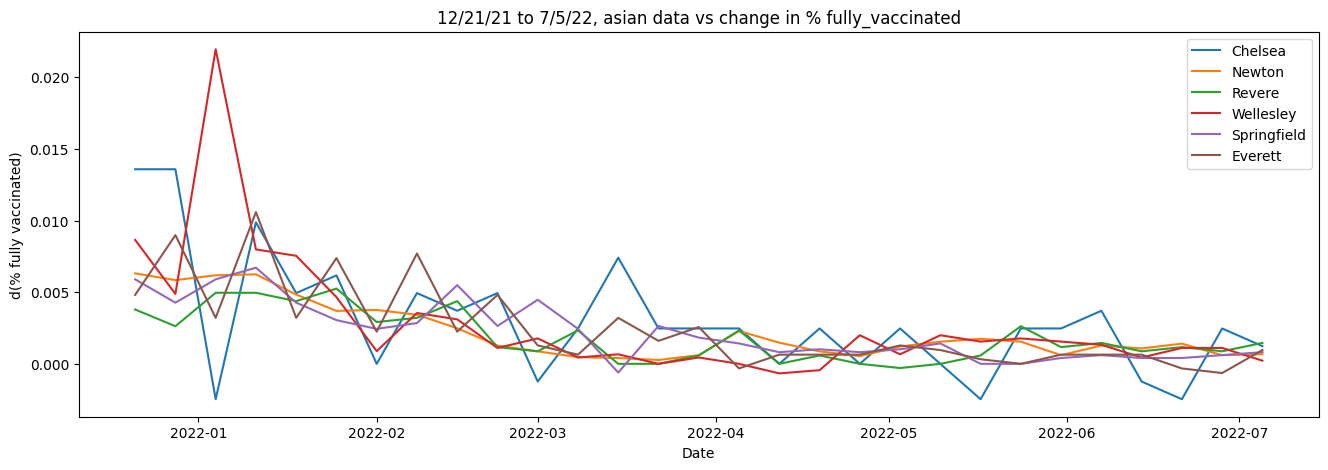

In [12]:
datepair = dates[3]
for i in range(len(titles)):
    title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
    plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


Within 9/7/21 to 12/14/21, it appears that the rate of change in % fully vaccinated doesn't seem to really change, except around 12/01/21, where the change in vaccination rate appears to increase.

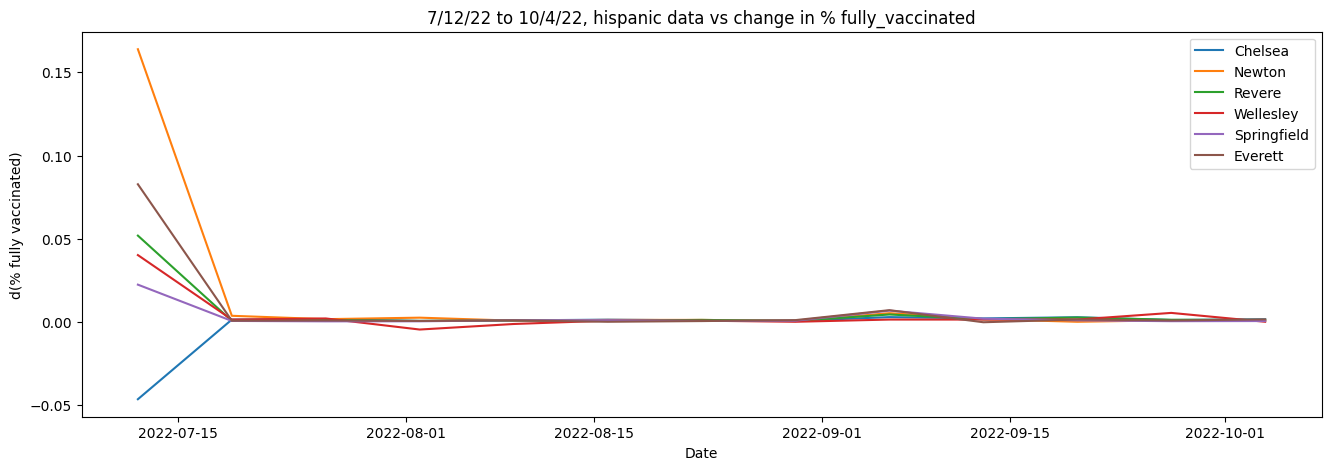

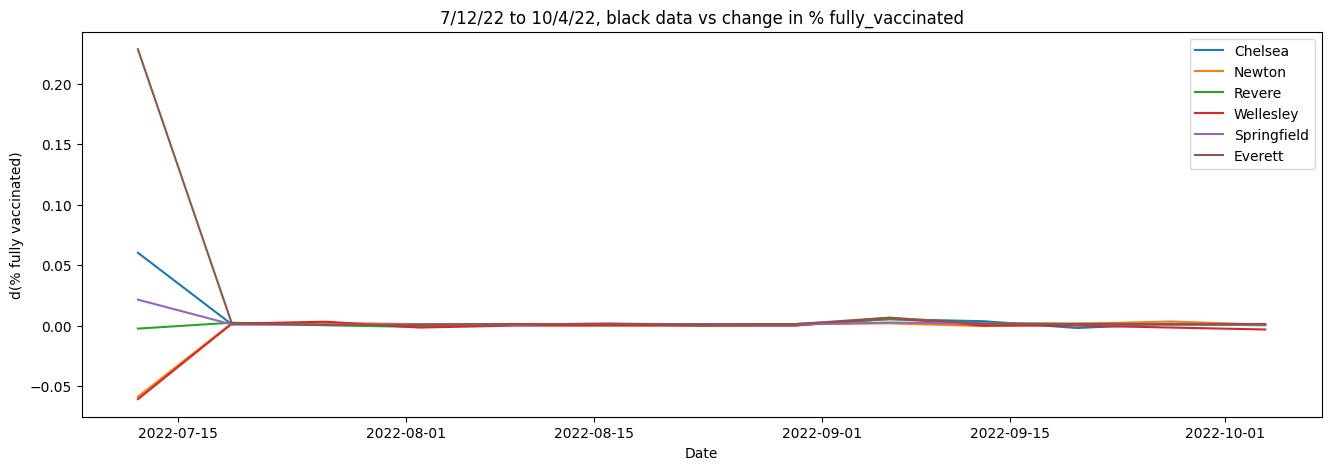

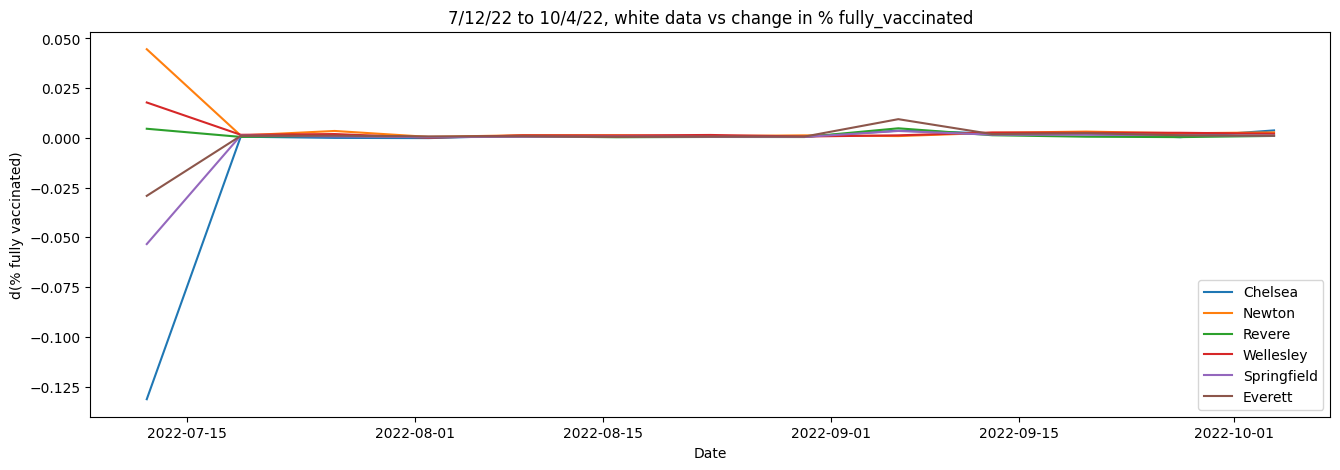

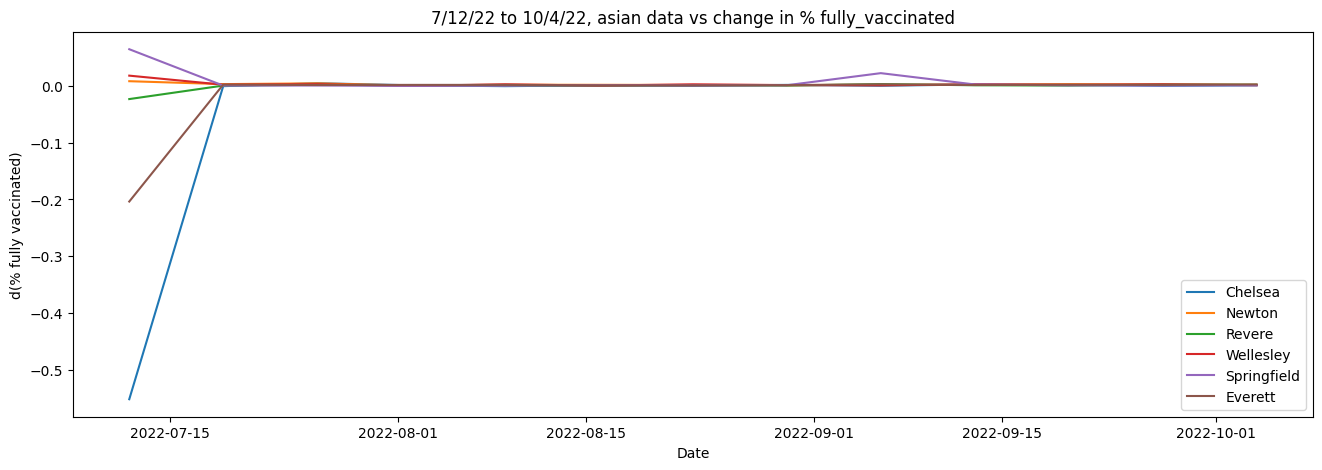

In [13]:
datepair = dates[4]
for i in range(len(titles)):
    title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
    plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


There appears to be a slight increase in rate of change in % fully vaccinated in 01/2022 before tapering down.

In [14]:
datepair = dates[5]
for i in range(len(titles)):
    title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs change in % fully_vaccinated"
    plot_df(racialdata[i], 'd(% fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


IndexError: list index out of range

#### legacy 3d plotter will not proceed with this as it looks not to be the most efficient way to display data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used Ffor ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [ ]:
# df = pd.read_csv('air_passengers.csv', parse_dates = ['Month'], index_col = ['Month'])
# df.head()
# plt.xlabel('Date')
# plt.ylabel('Number of air passengers')
# plt.plot(df)
testdf = pd.concat(racialdata)
testdf
testdf['days elapsed'] = (testdf['datetime'] - parser.parse("2021-03-09"))
testdf['days elapsed'] = testdf['days elapsed'].apply(lambda x: x.days/7)
df = testdf[['days elapsed', 'percentage (fully vaccinated)']]
ad_test(df['percentage (fully vaccinated)'])

1. ADF :  -7.340211622503442
2. P-value :  1.070094023558381e-10
3. Num Of Lags :  2
4. Num Of Observations Used Ffor ADF Regression and Critical Values Calculation : 1989
5. Critical values :
	 1% :  -3.4336419856688276
	 5% :  -2.862994217611322
	 10% :  -2.567544164035933


In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['percentage (fully vaccinated)'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4797.012, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4804.499, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4802.848, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4802.841, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4806.451, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4800.635, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.697 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1992
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2404.226
Date:                Thu, 01 Dec 2022   AIC                          -4806.451
Time:                        22:19:40   BIC                          -4800.855
Sample:                             0   HQIC                         -4804.396
                               - 1992                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0052    2.6e-05    201.137      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):            548248.66
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -8.65
Prob(H) (two-sided):                  0.03   Kurtosis:                        82.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
print(df.shape)
train = df.iloc[:-30]
test=df.iloc[-30:-15]

(1992, 2)


In [ ]:
model=sm.tsa.arima.ARIMA(train['percentage (fully vaccinated)'], order=(0,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     percentage (fully vaccinated)   No. Observations:                 1962
Model:                            ARIMA(0, 1, 0)   Log Likelihood                2357.029
Date:                           Thu, 01 Dec 2022   AIC                          -4712.057
Time:                                   22:22:46   BIC                          -4706.476
Sample:                                        0   HQIC                         -4710.006
                                          - 1962                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0053   2.66e-05    198.852      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):            532420.60
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -8.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)
#pred. index=df.index[start:end+1] |
#print(pred) i

1962    0.908245
1963    0.908245
1964    0.908245
1965    0.908245
1966    0.908245
1967    0.908245
1968    0.908245
1969    0.908245
1970    0.908245
1971    0.908245
1972    0.908245
1973    0.908245
1974    0.908245
1975    0.908245
1976    0.908245
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

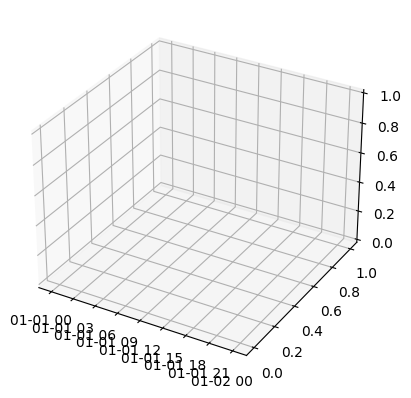

In [ ]:
# testing
dates = [("3/9/21", "6/8/21"), ("6/15/21", "9/7/21"), ("9/7/21", "12/14/21"), ("12/21/21", "7/5/22"), ("7/12/22", "10/4/22")]
titles = ["hispanic", "black", "white", "asian"]


def plot_df(df, ylabel, title="", xlabel='Date', dpi=100, beginning = "03/09/2021", end = "10/4/2022"):

    beginning = parser.parse(beginning)
    end = parser.parse(end)

    v, cities = df['city'].factorize()
    plt.figure(figsize=(16,5), dpi=dpi)
    for city in cities:
        subdf = df[df['city']==city]
        subdf = subdf[subdf['datetime'] <= end]
        subdf = subdf[subdf['datetime'] >= beginning]
        # print(subdf.shape)
        plt.plot(subdf['datetime'], subdf[ylabel], label = city)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

# for datepair in dates:
#     for i in range(len(titles)):
#         title = datepair[0]+ " to " + datepair[1] + ", " + titles[i] + " data vs % fully_vaccinated"
#         plot_df(racialdata[i], 'percentage (fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])

def plot_3d(df, ylabel, title="", xlabel='Date', dpi=100, beginning = "03/09/2021", end = "10/4/2022"):
    beginning = parser.parse(beginning)
    end = parser.parse(end)

    v, cities = df['city'].factorize()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for city in cities:
        subdf = df[df['city']==city]
        subdf = subdf[subdf['datetime'] <= end]
        subdf = subdf[subdf['datetime'] >= beginning]
        # print(subdf.shape)
        # plt.plot(subdf['datetime'], subdf[ylabel], label = city)
        ax.plot3D(subdf['datetime'], subdf[ylabel], [0 for element in range(len(subdf['datetime']))], 'gray')
        # plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
        # plt.legend()
    plt.show()

plot_eddf(racialdata[i], 'percentage (fully vaccinated)', title = title, beginning = datepair[0], end = datepair[1])


In [ ]:
subdf

index        date   county     city   race population atleast_onedose  \
0       2  2021-03-09  Suffolk  Chelsea  Black       3336             399   
1      11  2021-03-16  Suffolk  Chelsea  Black       3336             460   
2      20  2021-03-23  Suffolk  Chelsea  Black       3336             534   
3      29  2021-03-30  Suffolk  Chelsea  Black       3336             608   
4      38  2021-04-06  Suffolk  Chelsea  Black       3336             702   
..    ...         ...      ...      ...    ...        ...             ...   
78    704  2022-09-06  Suffolk  Chelsea  Black       3014            2265   
79    713  2022-09-13  Suffolk  Chelsea  Black       3014            2279   
80    722  2022-09-20  Suffolk  Chelsea  Black       3014            2275   
81    731  2022-09-27  Suffolk  Chelsea  Black       3014            2278   
82    740  2022-10-04  Suffolk  Chelsea  Black       3014            2283   

   fully_vaccinated boosted boosted_second  ... Unnamed: 21 fully/population  \
0               237     NaN            NaN  ...      revere    0.03515259084   
1               277     NaN            NaN  ...         NaN              NaN   
2               330     NaN            NaN  ...         NaN              NaN   
3               372     NaN            NaN  ...         NaN              NaN   
4               419     NaN            NaN  ...         NaN              NaN   
..              ...     ...            ...  ...         ...              ...   
78             1913     937            129  ...         NaN              NaN   
79             1924     942            132  ...         NaN              NaN   
80             1918     947            140  ...         NaN              NaN   
81             1923     953            148  ...         NaN              NaN   
82             1925     956            156  ...         NaN              NaN   

   partially/population   fully/total partially/total   datetime  \
0         0.04424066131  0.1841901317    0.3033581249 2021-03-09   
1                   NaN           NaN             NaN 2021-03-16   
2                   NaN           NaN             NaN 2021-03-23   
3                   NaN           NaN             NaN 2021-03-30   
4                   NaN           NaN             NaN 2021-04-06   
..                  ...           ...             ...        ...   
78                  NaN           NaN             NaN 2022-09-06   
79                  NaN           NaN             NaN 2022-09-13   
80                  NaN           NaN             NaN 2022-09-20   
81                  NaN           NaN             NaN 2022-09-27   
82                  NaN           NaN             NaN 2022-10-04   

   percentage (at least one dose) d(% at least one dose)  \
0                        0.119604               0.000000   
1                        0.137890               0.018285   
2                        0.160072               0.022182   
3                        0.182254               0.022182   
4                        0.210432               0.028177   
..                            ...                    ...   
78                       0.751493               0.004645   
79                       0.756138               0.004645   
80                       0.754811              -0.001327   
81                       0.755806               0.000995   
82                       0.757465               0.001659   

   percentage (fully vaccinated) d(% fully vaccinated)  
0                       0.071043              0.000000  
1                       0.083034              0.011990  
2                       0.098921              0.015887  
3                       0.111511              0.012590  
4                       0.125600              0.014089  
..                           ...                   ...  
78                      0.634705              0.005309  
79                      0.638354              0.003650  
80                      0.636364             -0.001991  
81        

index        date     county     city      race population  \
0        3  2021-03-09    Suffolk  Chelsea  Hispanic      25092   
1       12  2021-03-16    Suffolk  Chelsea  Hispanic      25092   
2       21  2021-03-23    Suffolk  Chelsea  Hispanic      25092   
3       30  2021-03-30    Suffolk  Chelsea  Hispanic      25092   
4       39  2021-04-06    Suffolk  Chelsea  Hispanic      25092   
..     ...         ...        ...      ...       ...        ...   
493   4438  2022-09-06  Middlesex  Everett     Asian       4012   
494   4447  2022-09-13  Middlesex  Everett     Asian       4012   
495   4456  2022-09-20  Middlesex  Everett     Asian       4012   
496   4465  2022-09-27  Middlesex  Everett     Asian       4012   
497   4474  2022-10-04  Middlesex  Everett     Asian       4012   

    atleast_onedose fully_vaccinated boosted boosted_second  ... Unnamed: 21  \
0              1791              810     NaN            NaN  ...    wellsley   
1              2201             1082     NaN            NaN  ...         NaN   
2              2653             1415     NaN            NaN  ...         NaN   
3              3357             1849     NaN            NaN  ...         NaN   
4              4354             2126     NaN            NaN  ...         NaN   
..              ...              ...     ...            ...  ...         ...   
493            3304             2924    1757            185  ...         NaN   
494            3315             2929    1760            192  ...         NaN   
495            3322             2936    1761            203  ...         NaN   
496            3331             2942    1768            223  ...         NaN   
497            3337             2951    1773            242  ...         NaN   

    fully/population partially/population  fully/total partially/total  \
0     0.004139602194       0.004880018847  0.018996139   0.02936411503   
1                NaN                  NaN          NaN             NaN   
2                NaN                  NaN          NaN             NaN   
3                NaN                  NaN          NaN             NaN   
4                NaN                  NaN          NaN             NaN   
..               ...                  ...          ...             ...   
493              NaN                  NaN          NaN             NaN   
494              NaN                  NaN          NaN             NaN   
495              NaN                  NaN          NaN             NaN   
496              NaN                  NaN          NaN             NaN   
497              NaN                  NaN          NaN             NaN   

      datetime percentage (at least one dose) d(% at least one dose)  \
0   2021-03-09                       0.071377               0.000000   
1   2021-03-16                       0.087717               0.016340   
2   2021-03-23                       0.105731               0.018014   
3   2021-03-30                       0.133788               0.028057   
4   2021-04-06                       0.173521               0.039734   
..         ...                            ...                    ...   
493 2022-09-06                       0.823529               0.003739   
494 2022-09-13                       0.826271               0.002742   
495 2022-09-20                       0.828016               0.001745   
496 2022-09-27                       0.830259               0.002243   
497 2022-10-04                       0.831755               0.001496   

    percentage (fully vaccinated) d(% fully vaccinated)  
0                        0.032281              0.000000  
1                        0.043121              0.010840  
2                        0.056392              0.013271  
3                        0.073689              0.017296  
4                        0.084728              0.011039  
..                            ...                   ...  
493                      0.728814              0.002493  
494                  

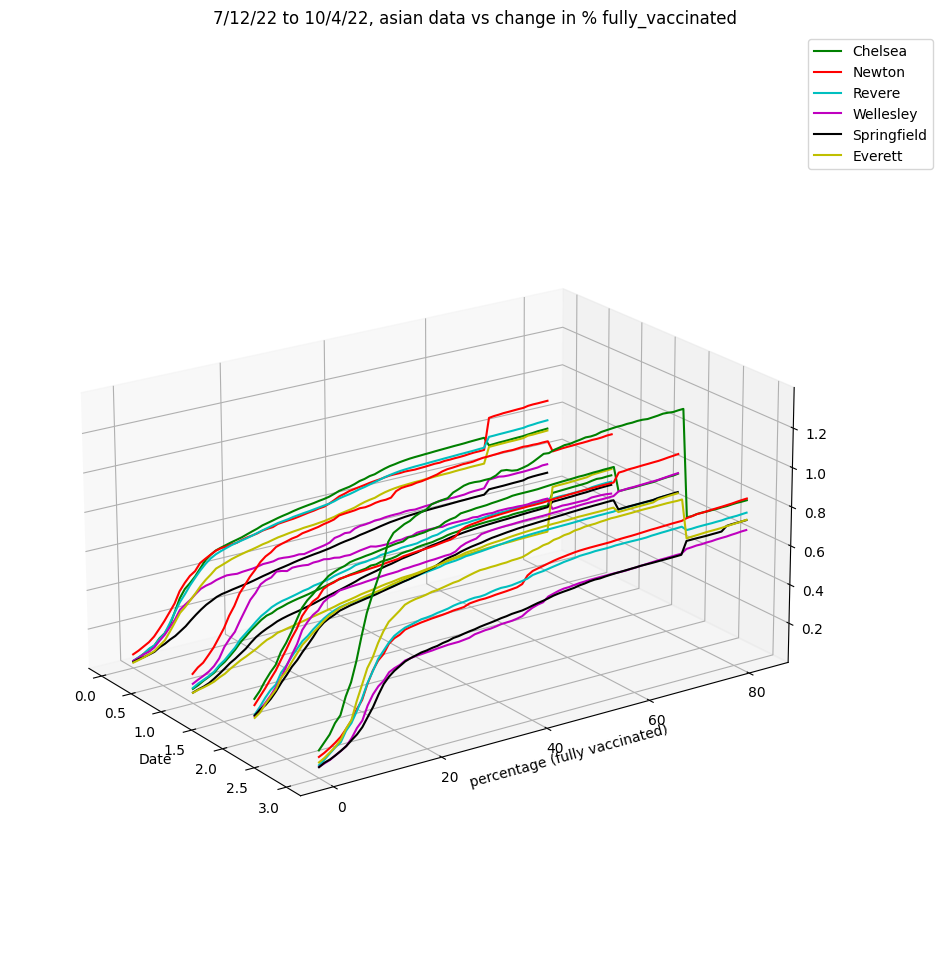

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
racialdata[1]

def plot_3d(df, ylabel, title="", xlabel='Date', dpi=100, beginning = "03/09/2021", end = "10/4/2022"):
    beginning = parser.parse(beginning)
    end = parser.parse(end)
    titles = ["Hispanic", "Black", "White", "Asian"]
    citycolors = ['g', 'r', 'c', 'm', 'k','y', 'p']
    v, cities = df['city'].factorize()
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12,16), dpi=dpi)
    x_scale=4
    y_scale=6
    z_scale=4

    scale=np.diag([x_scale, y_scale, z_scale, 1.0])
    scale=scale*(1.0/scale.max())
    scale[3,3]=1.0

    def short_proj():
        return np.dot(Axes3D.get_proj(ax), scale)

    ax.get_proj=short_proj
    #convert into integer datetime for 3d plotting
    
    for i in range(4):
        racedf = df[df['race'] == titles[i]]
        for c in range(len(cities)):
            subdf = racedf[racedf['city']==cities[c]]
            subdf['days elapsed'] = (subdf['datetime'] - parser.parse("2021-03-09"))
            subdf['days elapsed'] = subdf['days elapsed'].apply(lambda x: x.days/7)
            subdf = subdf[subdf['datetime'] <= end]
            subdf = subdf[subdf['datetime'] >= beginning]

            if i == 0:
                ax.plot([i for _ in range(len(subdf['datetime']))], subdf['days elapsed'], subdf['percentage (fully vaccinated)'], zdir='z', color=citycolors[c], label = cities[c])
            else:
                ax.plot([i for _ in range(len(subdf['datetime']))], subdf['days elapsed'], subdf['percentage (fully vaccinated)'], zdir='z', color=citycolors[c])

            plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
            plt.legend()
    ax.view_init(elev=20., azim=-35)

    plt.show()
    

plot_3d(testdf, 'percentage (fully vaccinated)', title = title)

# plt.show()
# x = np.array([1,2,3]) + 1